<a href="https://www.kaggle.com/code/michaelwovo/skin-burn?scriptVersionId=103576204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Skin Burn Demo notebook trained on Yolov5S
Github Repo: https://github.com/Michael-OvO/Skin-Burn-Detection

Credit: This is a small demo for training our dataset on Yolov5M, which can achieve a decent result.

Author: Michael

created: 2022.8.16

# If you enjoyed this small demo please take a look at my github repo (Not finished yet, but give it a star or watch it) as I will be putting the rest of the materials up soon.
link to the repo: https://github.com/Michael-OvO/Skin-Burn-Detection
Thank you all for supporting!

## 1. Check hardware and set up the environment
Check GPU and install enviornments

In [1]:
!nvidia-smi

Thu Aug 18 02:50:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

git clone the yolov5 repo

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11748, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 11748 (delta 47), reused 88 (delta 34), pack-reused 11632
Receiving objects: 100% (11748/11748), 12.47 MiB | 22.02 MiB/s, done.
Resolving deltas: 100% (8040/8040), done.
/kaggle/working/yolov5


install needed dependencies

In [3]:
!pip install -r requirements.txt  # install dependencies (ignore errors)

prepare dataset

In [4]:
!pip install roboflow

  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for roboflow: filename=roboflow-0.2.14-py3-none-any.whl size=24837 sha256=d3f920ccd9fe6948856f40e099b63dc6c4561a55eb3fe3dadf7f0611423c9a97
  Stored in directory: /root/.cache/pip/wheels/c7/84/36/a6a32c749ead923690d15d20443fb53fa2fe10beaa408f371b
  Created wheel for glob2: filename=glob2-

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="ayUn19nAlV2gQNRP8NI8")
project = rf.workspace("yingcai").project("skin_burn_fixed")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Skin_burn_fixed-5 in yolov5pytorch:: 100%|██████████| 4096/4096 [00:01<00:00, 2387.41it/s]


## Check if the dataset is installed properly

In [6]:
!ls

CONTRIBUTING.md    classify   hubconf.py	train.py
LICENSE		   data       models		tutorial.ipynb
README.md	   detect.py  requirements.txt	utils
Skin_burn_fixed-5  export.py  setup.cfg		val.py


## Optional: Login to Wandb to track training results
please set up your user secret as indicated in the comments below

In [7]:
!pip install --upgrade -q wandb

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.
allennlp 2.10.0 requires wandb<0.13.0,>=0.10.0, but you have wandb 0.13.1 which is incompatible.


In [8]:
import wandb
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()

# I have saved my API token with "wandb_api" as Label. 
# If you use some other Label make sure to change the same below. 
wandb_api = user_secrets.get_secret("wandb_api") 

wandb.login(key=wandb_api)

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Train Command
feel free to play around with epochs, batchsize, and all other kinds of perameters. 

In [9]:
!python train.py --img 416 --epoch 500 --batch-size 128 --data Skin_burn_fixed-5/data.yaml --cfg ./models/yolov5s.yaml --name exp  --cache

wandb: Currently logged in as: michael_ovo. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=Skin_burn_fixed-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=128, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr

## Run Inference
After a sucess run(roughly around 5~6 hours if the model is trained for 500 epochs, the model will be saved inside runs/train/exp/weights/best.pt), looad that model and run an inference on the validation/test dataset with detect.py

In [10]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.3 --source Skin_burn_fixed-5/test/images/

detect: weights=['runs/train/exp/weights/best.pt'], source=Skin_burn_fixed-5/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/87 /kaggle/working/yolov5/Skin_burn_fixed-5/test/images/---------12-_JPG.rf.cd83279fcc2825c9b8bc0844bc7698b9.jpg: 320x416 4 2nd degree burns, 2 3rd degrees, Done. (0.009s)
image 2/87 /kaggle/working/yolov5/Skin_burn_fixed-5/test/images/---------7-_JPG.rf.b4cbfc0cb1d6324ab0adcd8b592ff18d.jpg: 320x416 1 2nd degree burn, Done. (0.008s)


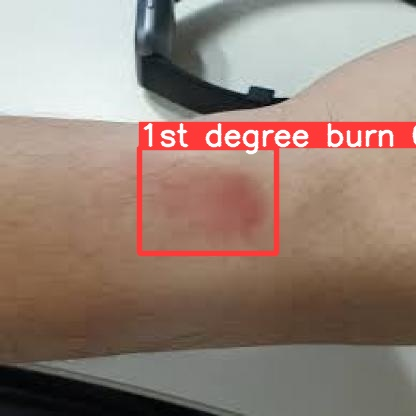

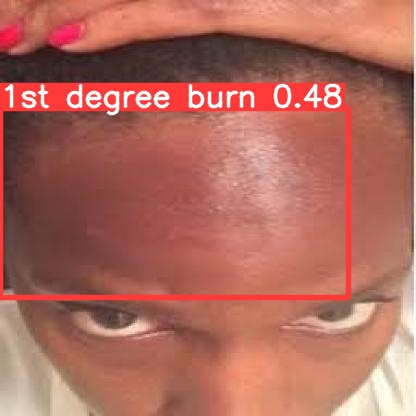

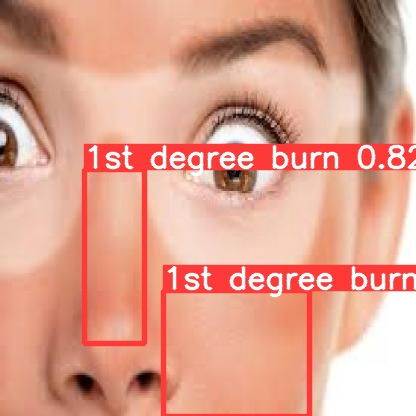

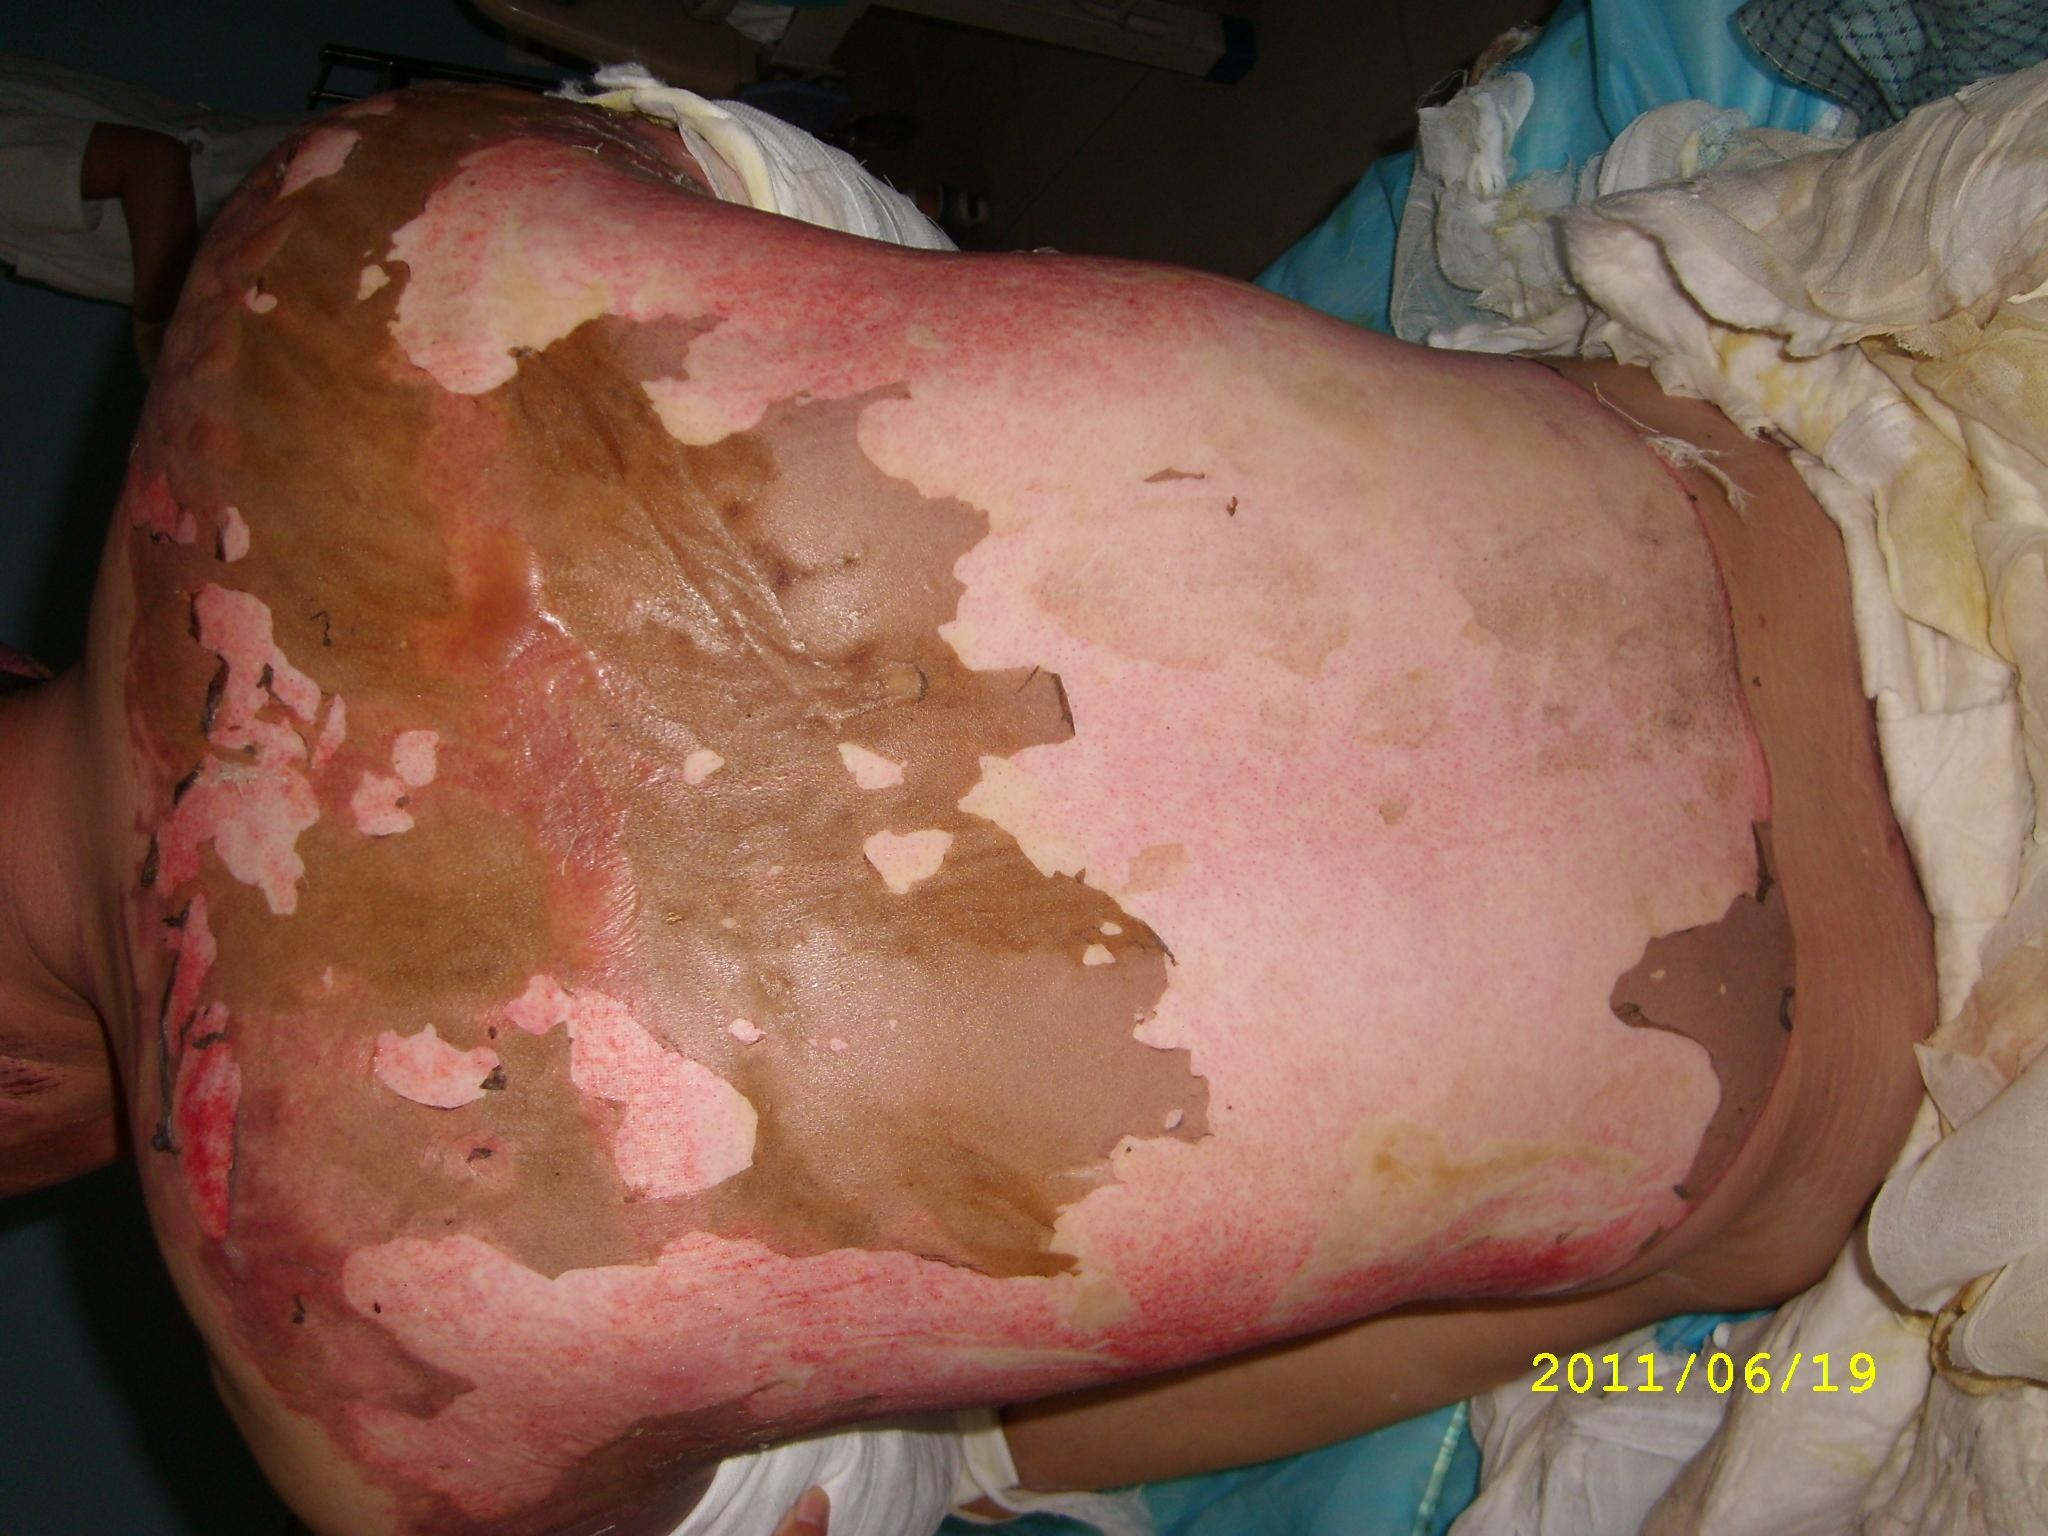

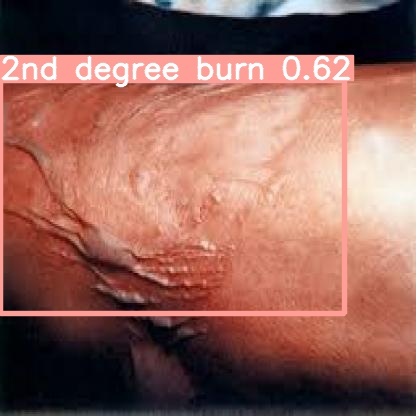

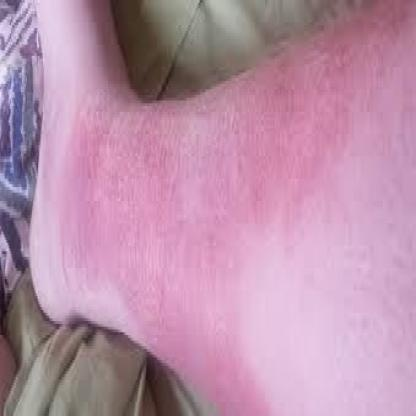

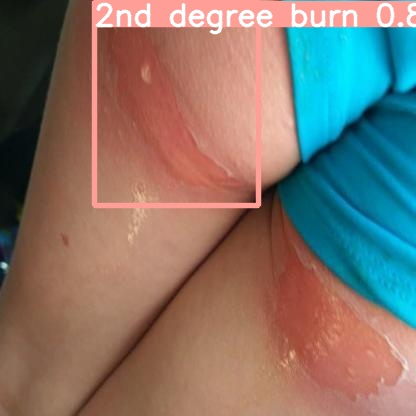

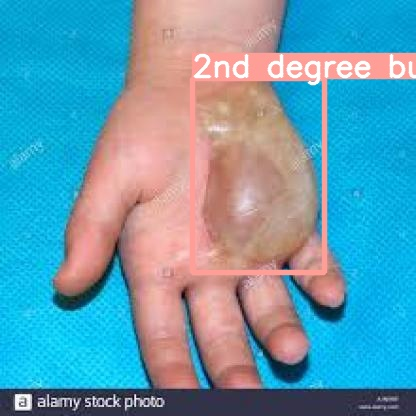

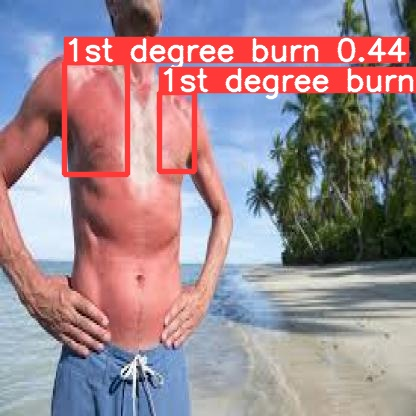

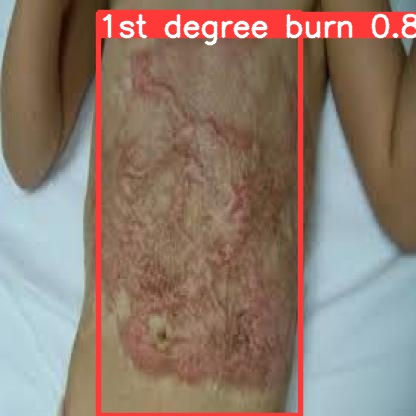

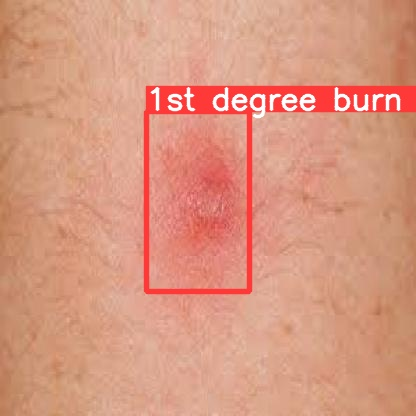

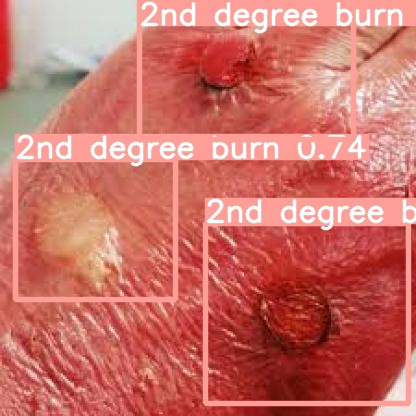

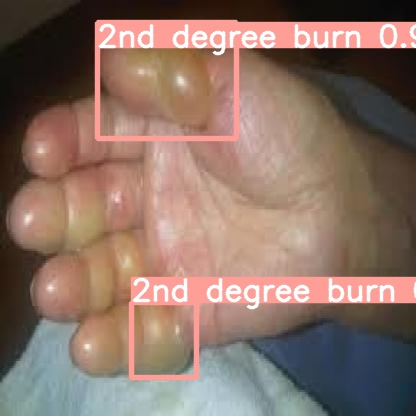

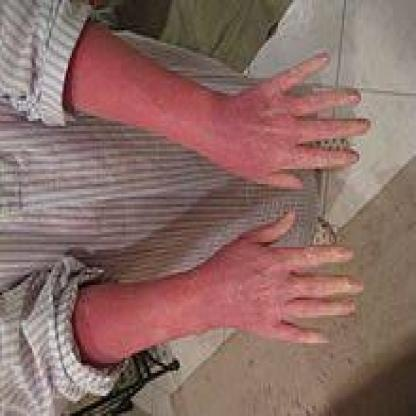

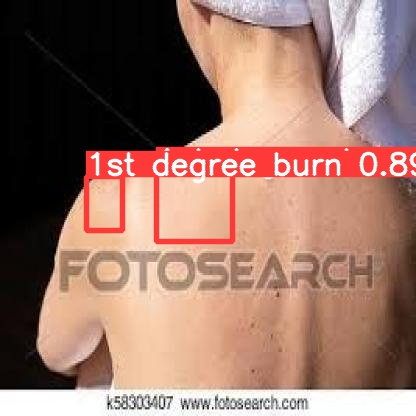

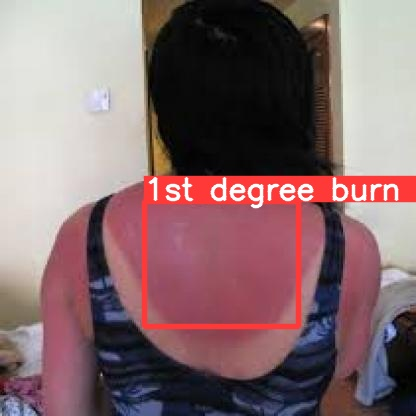

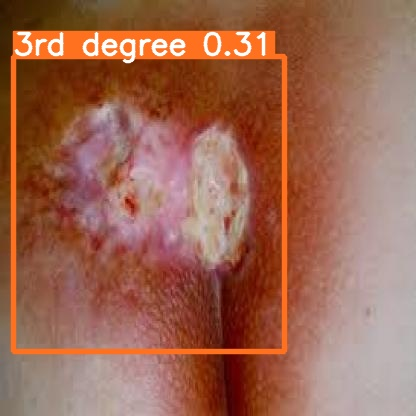

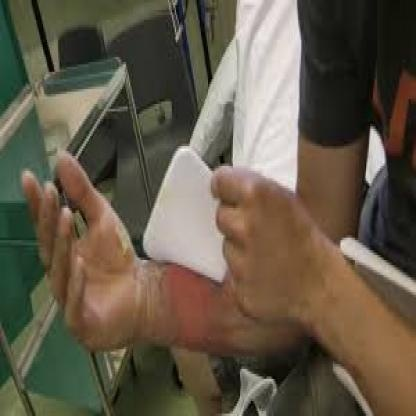

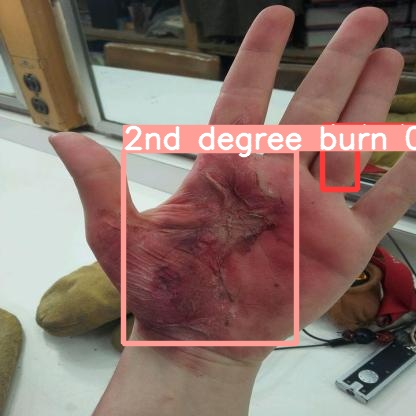

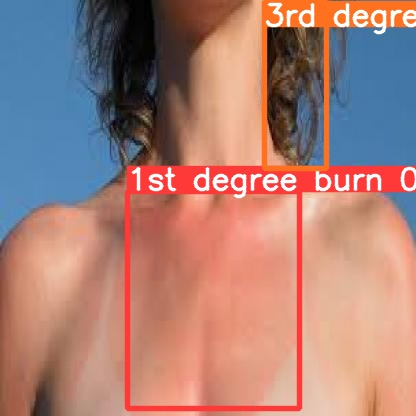

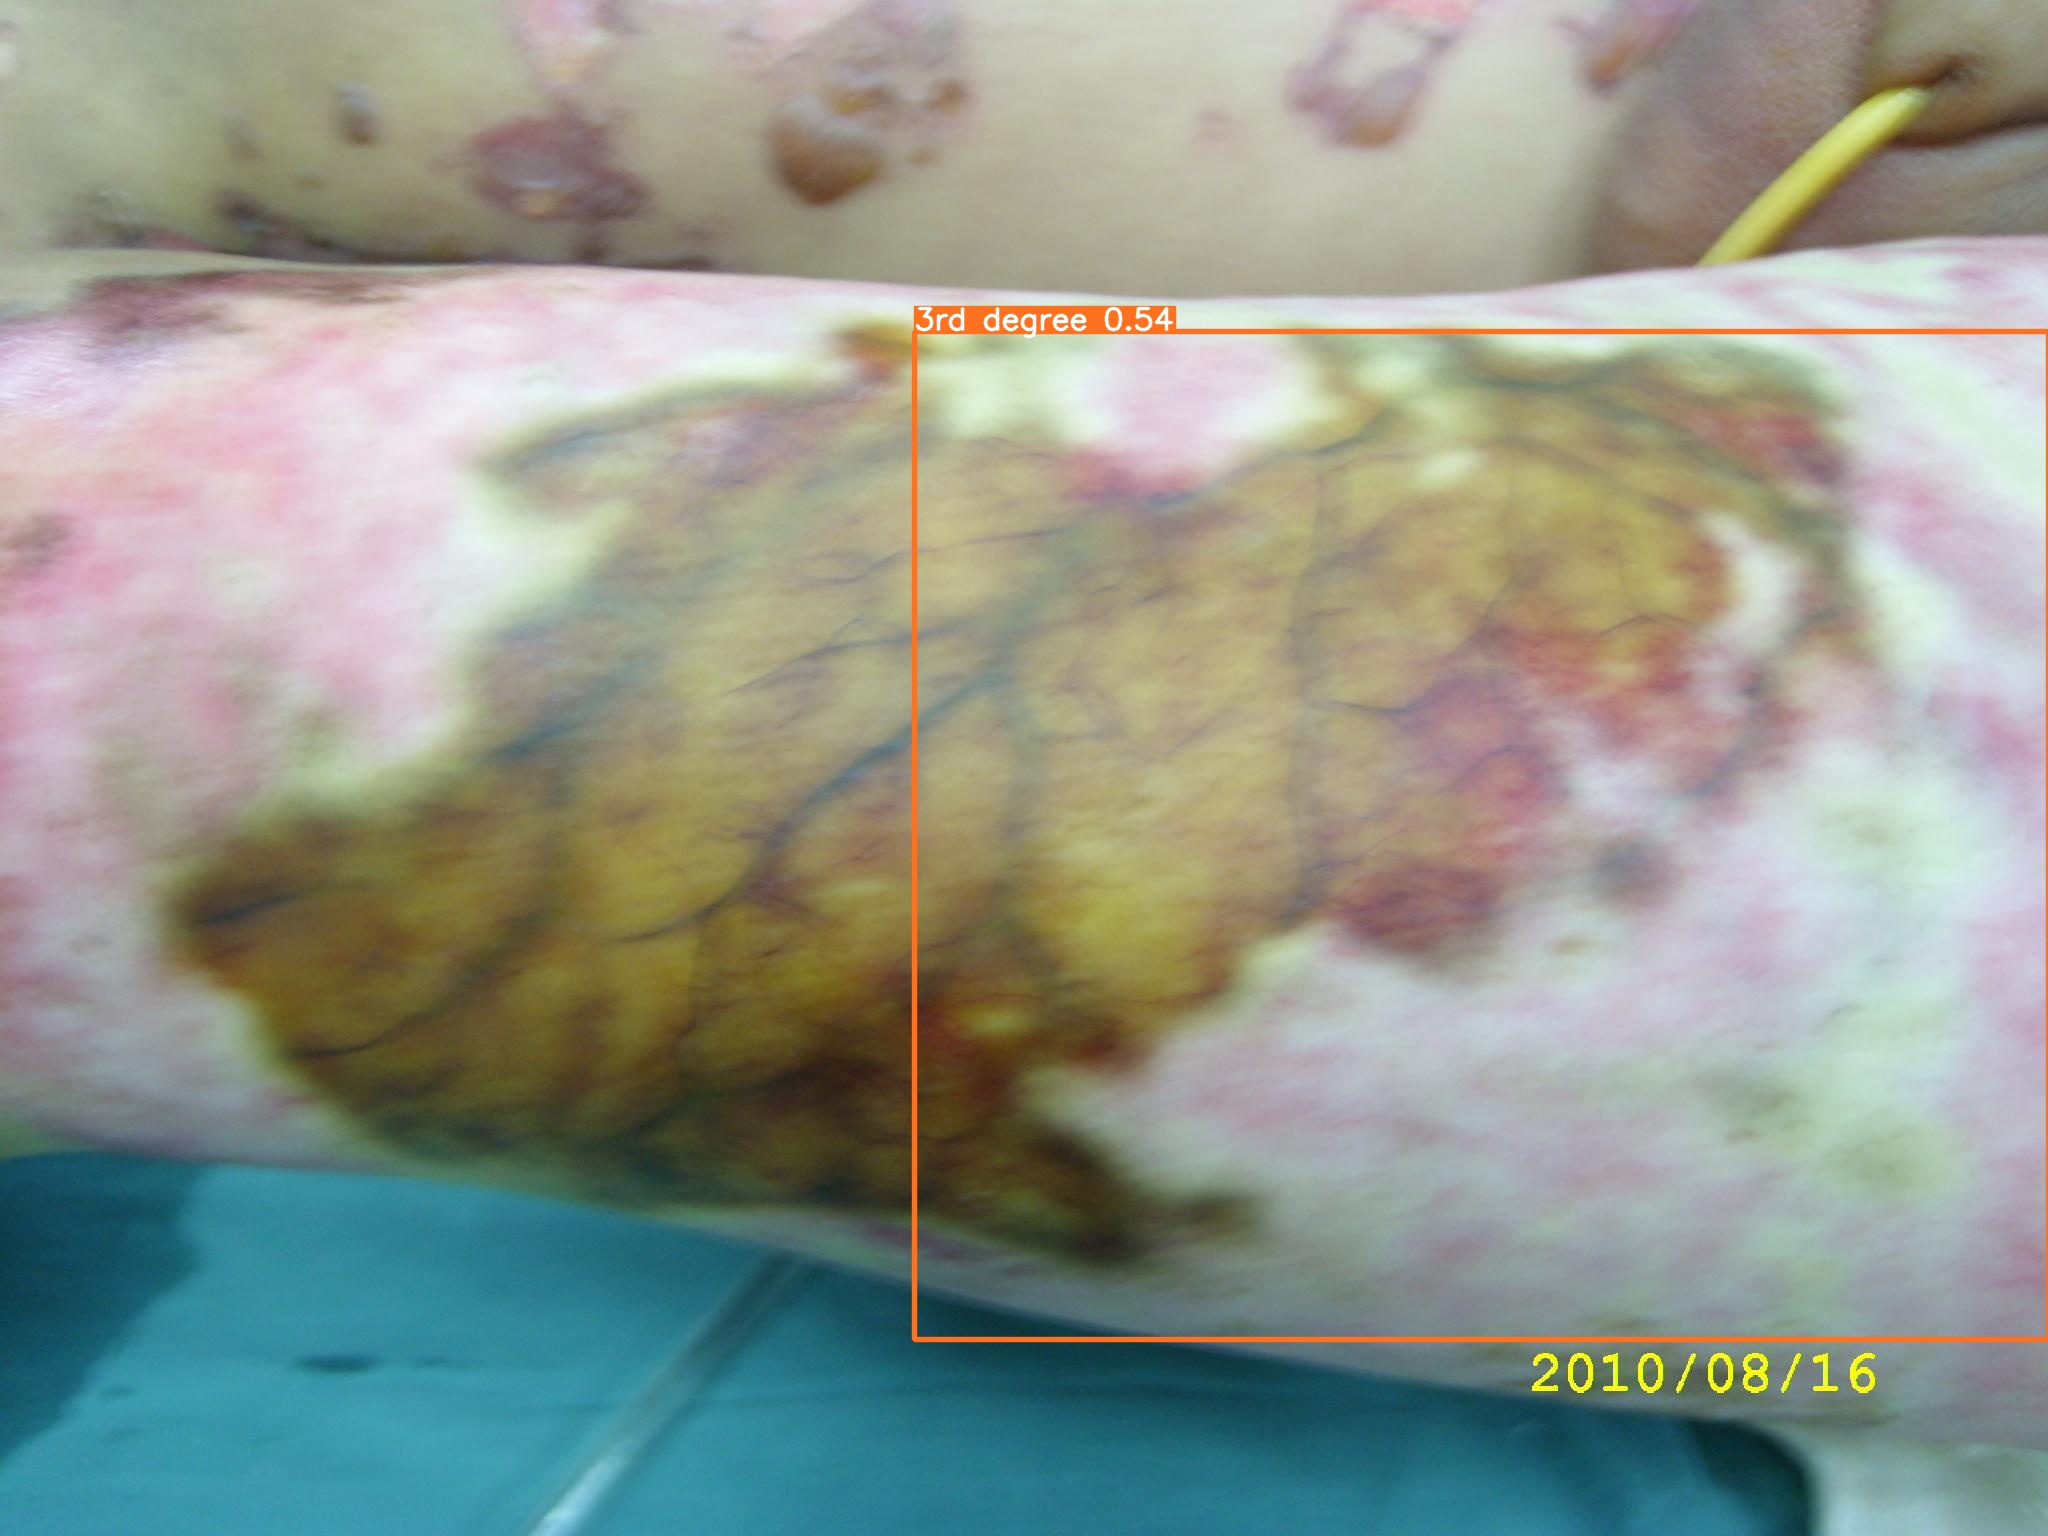

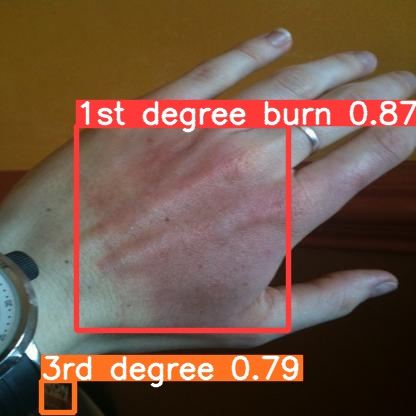

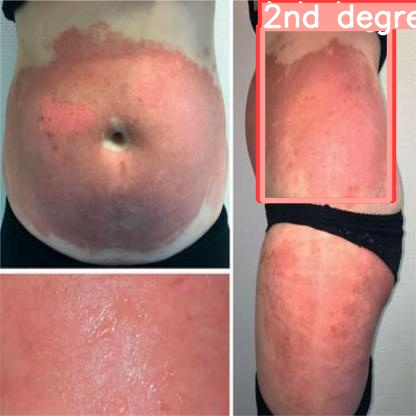

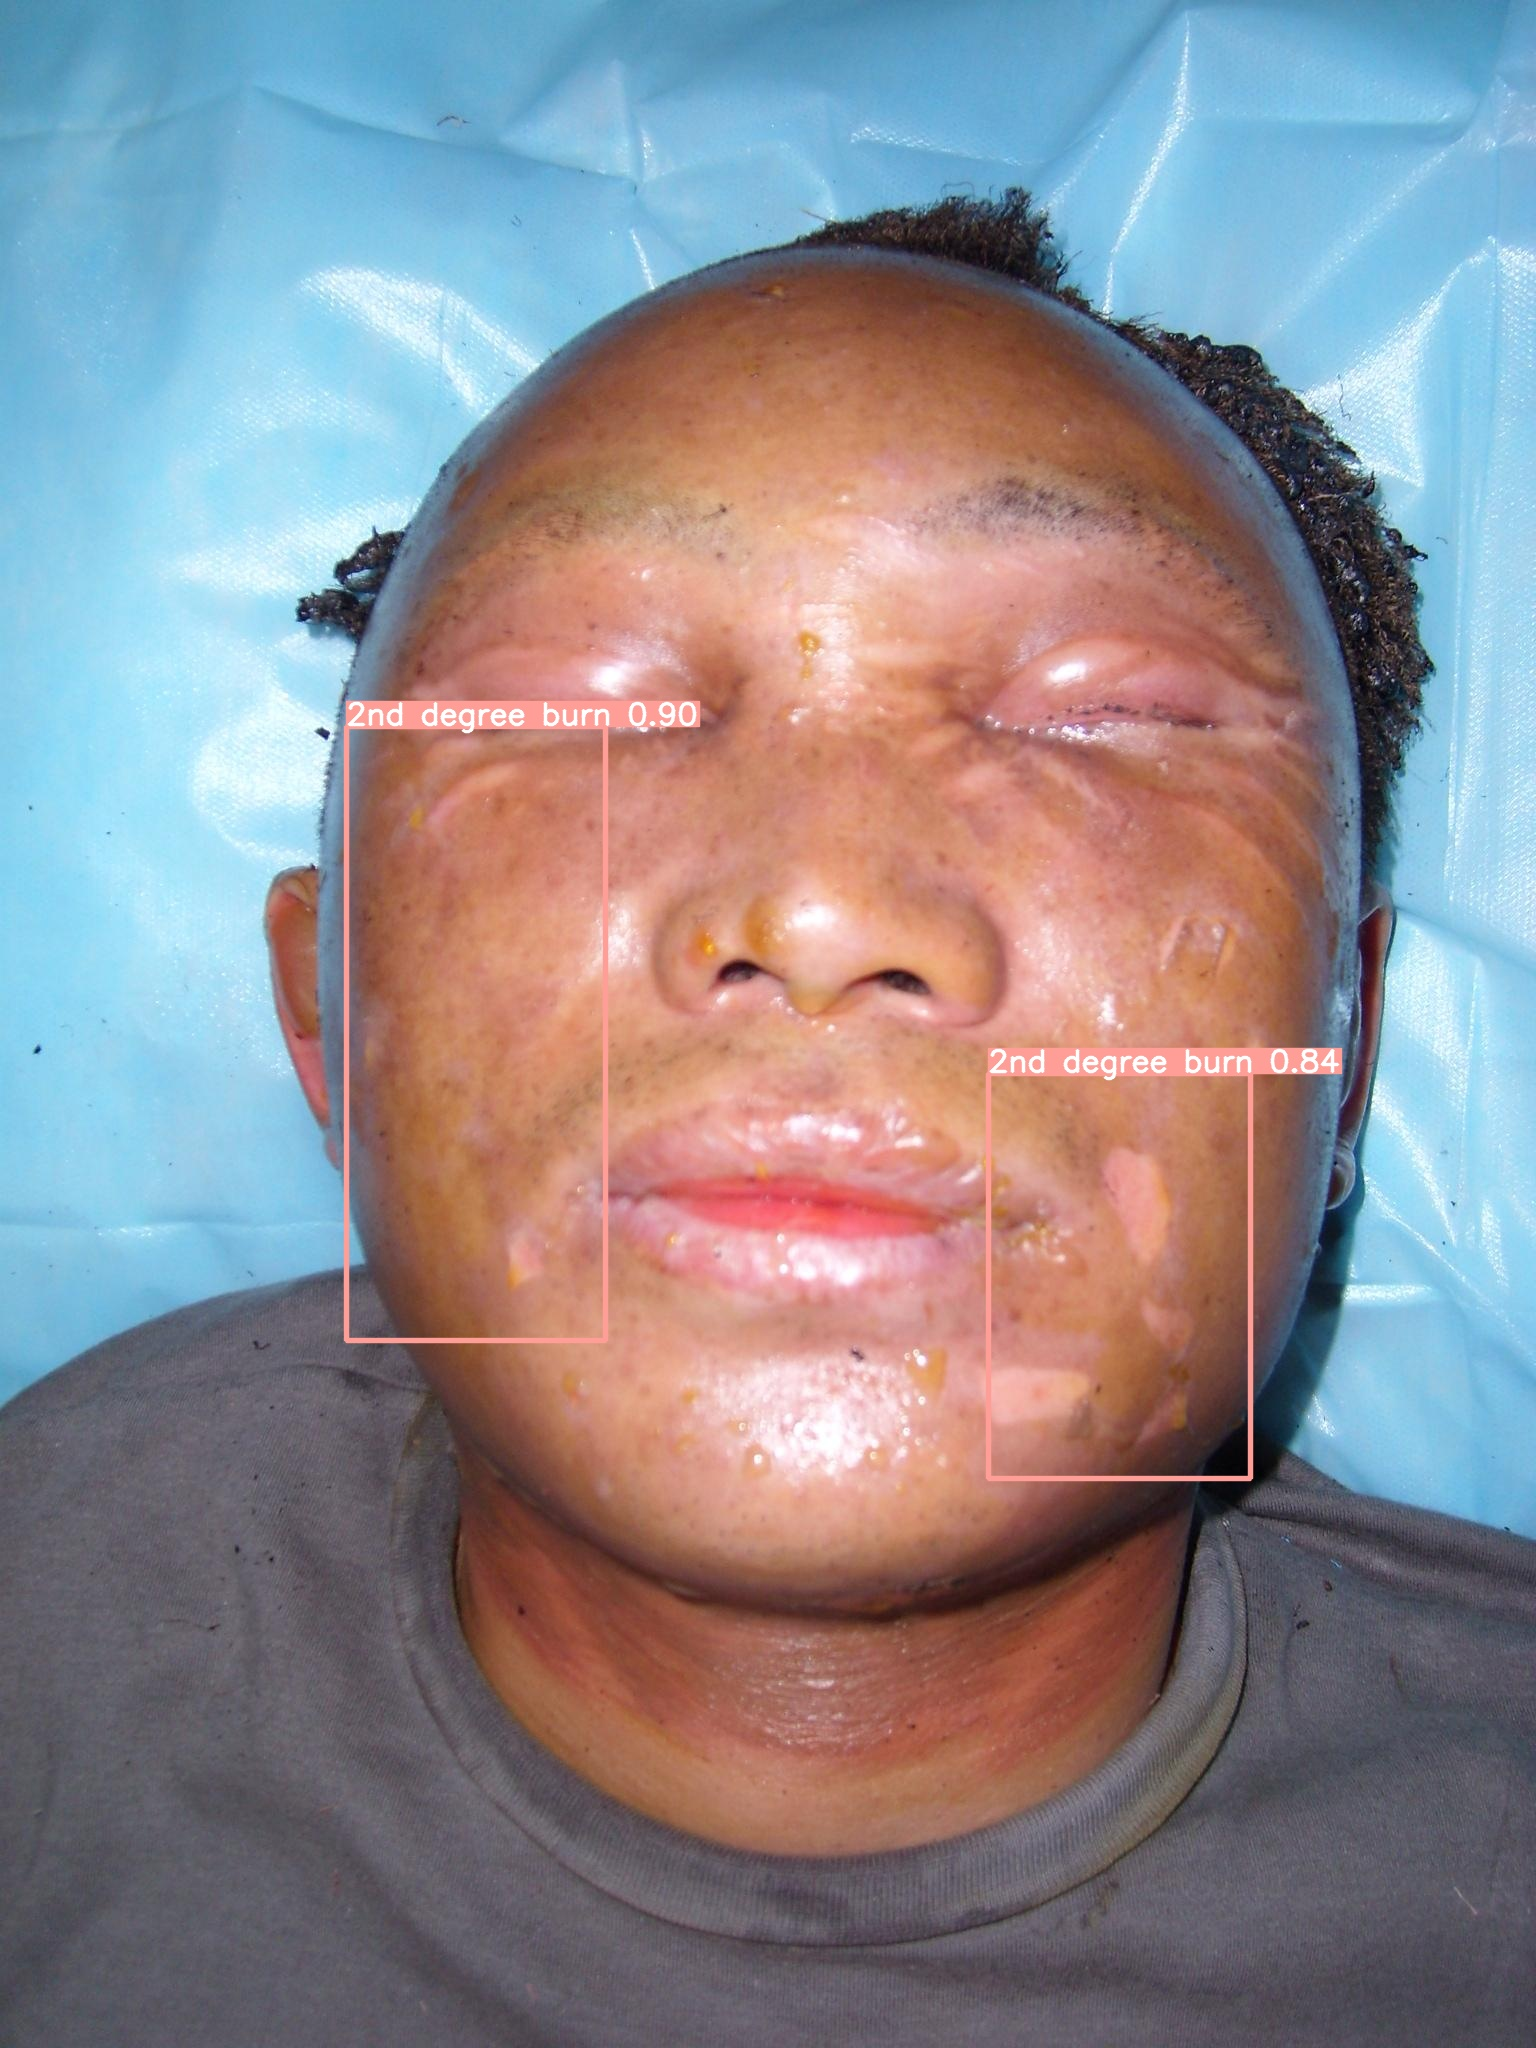

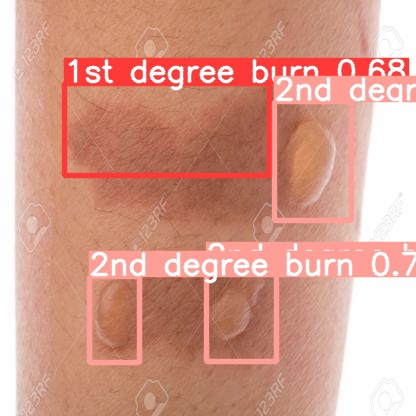

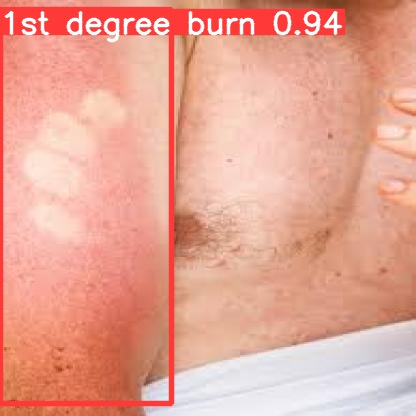

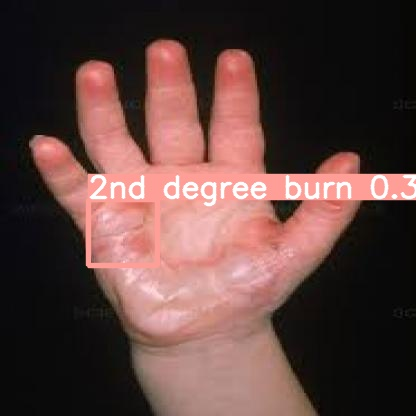

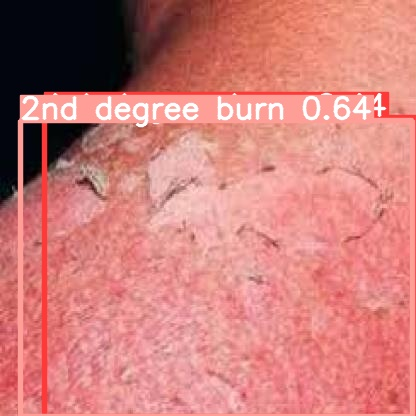

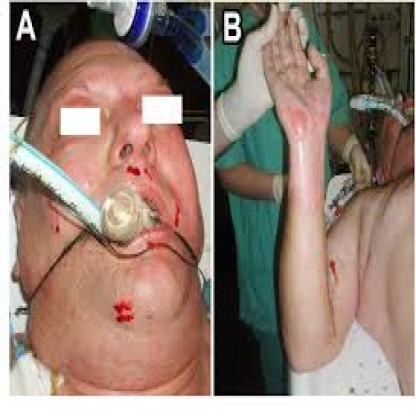

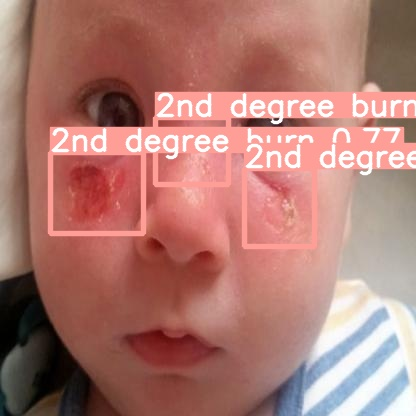

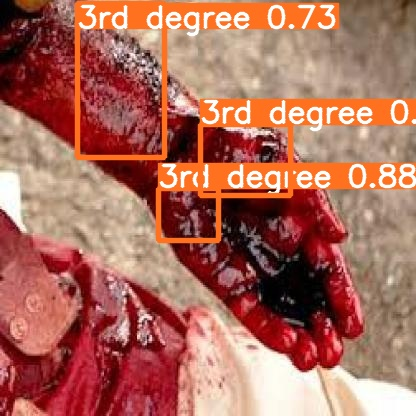

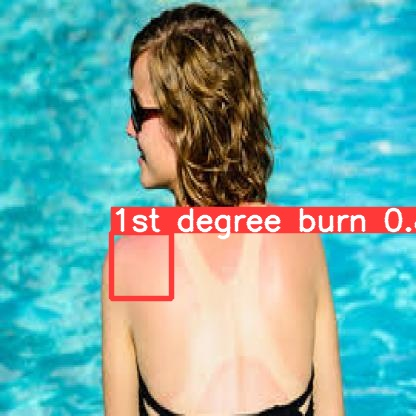

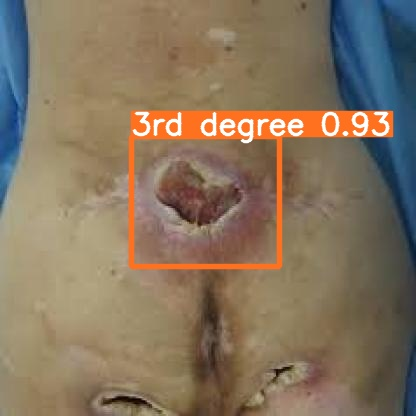

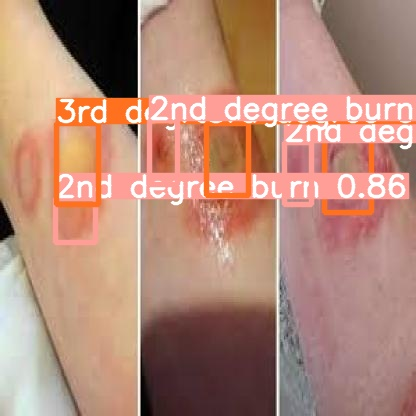

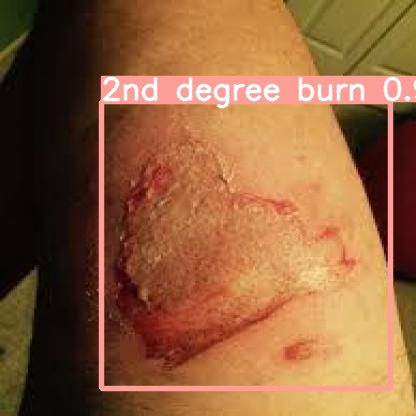

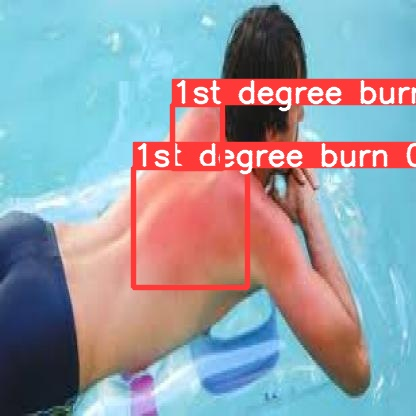

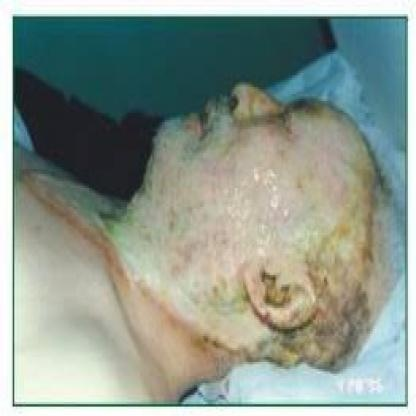

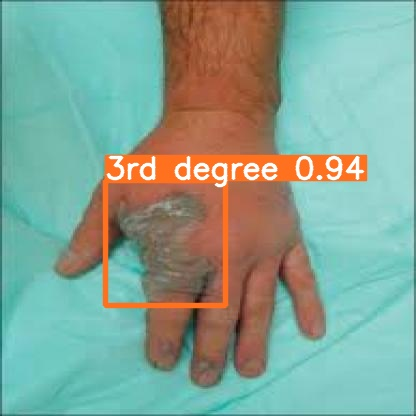

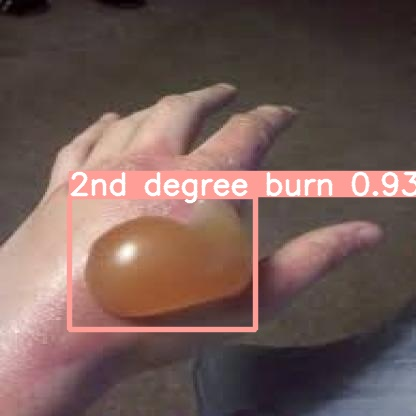

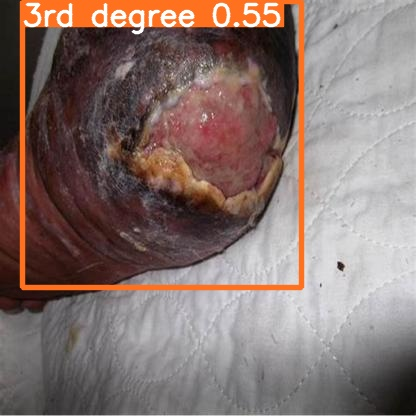

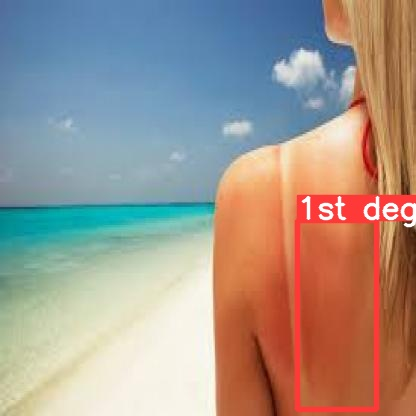

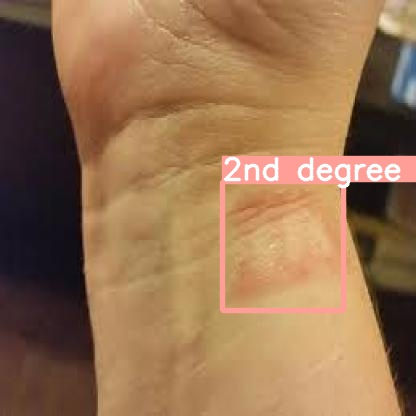

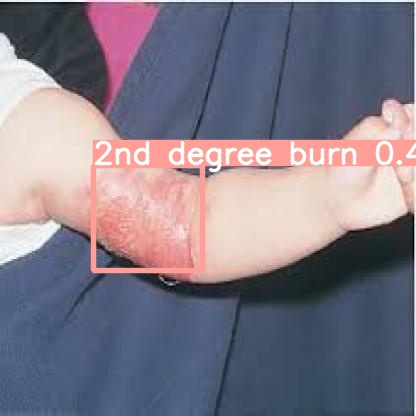

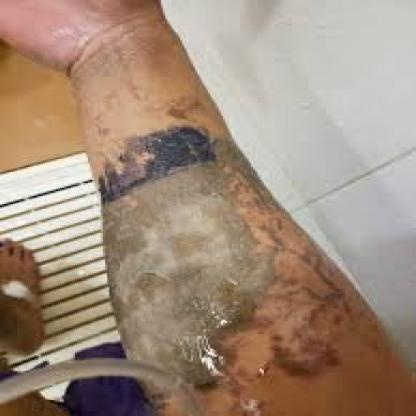

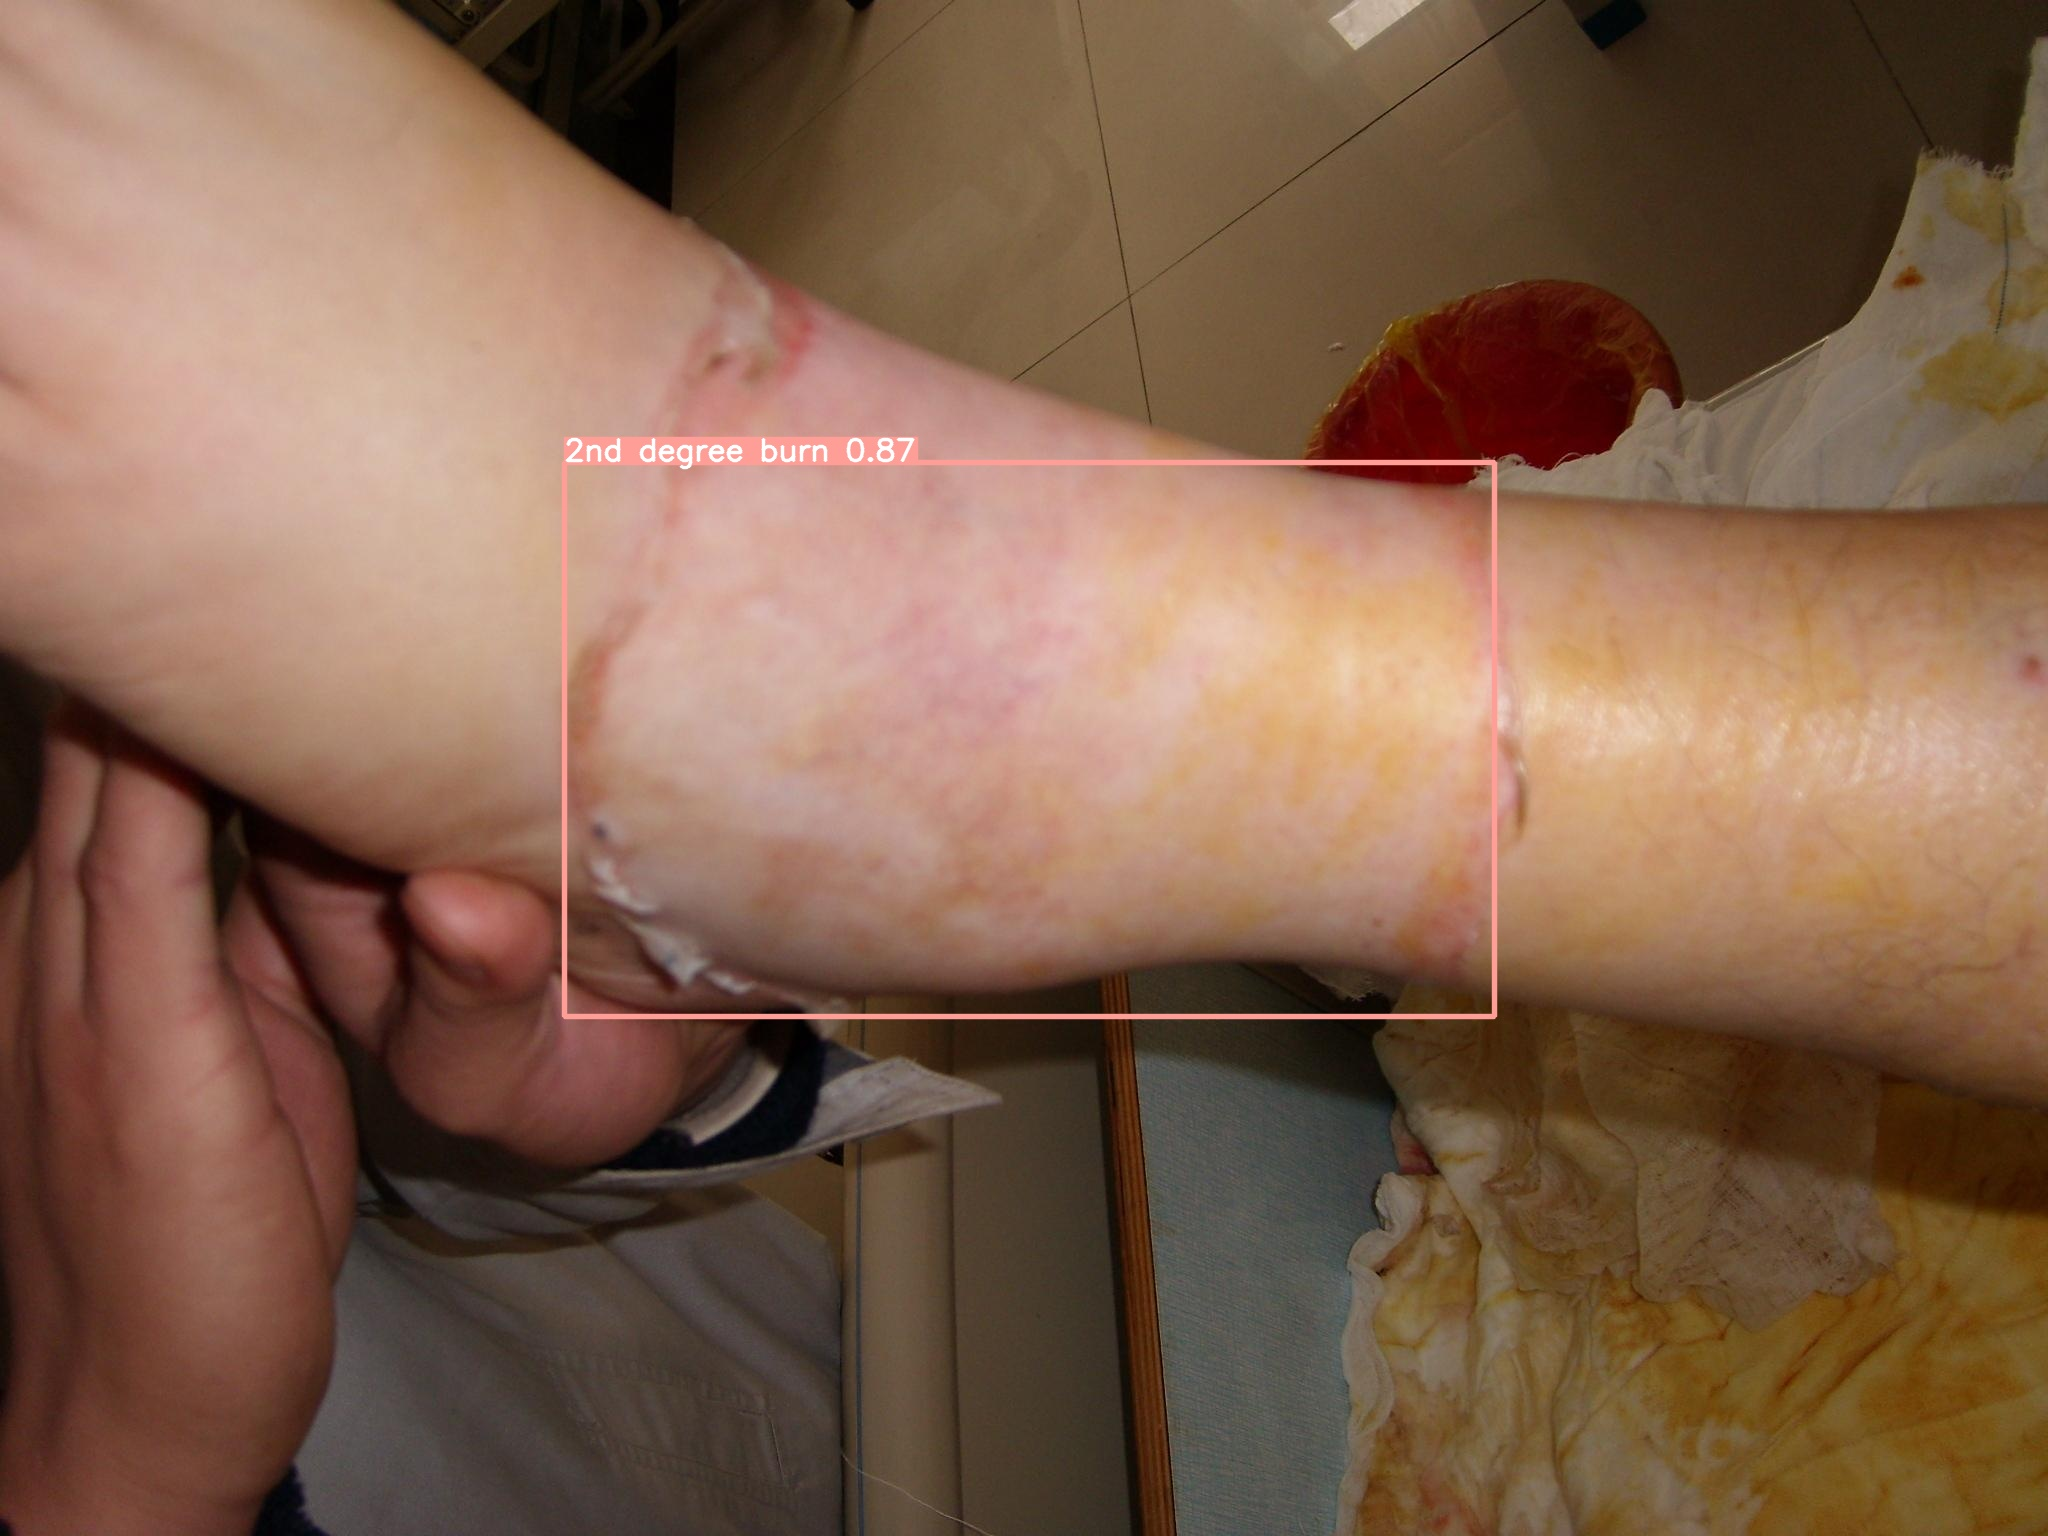

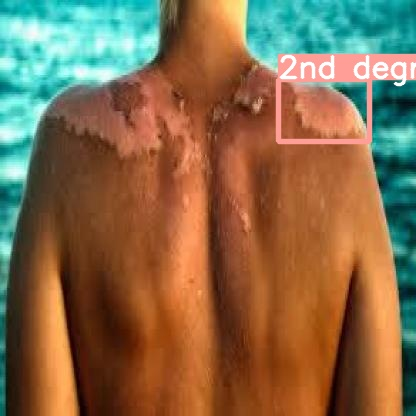

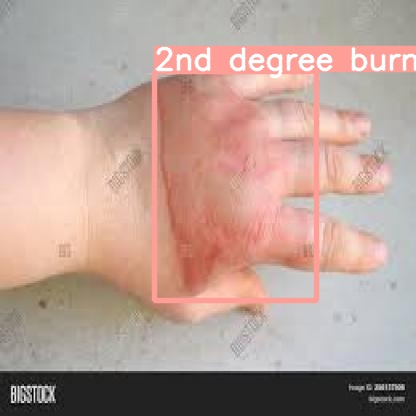

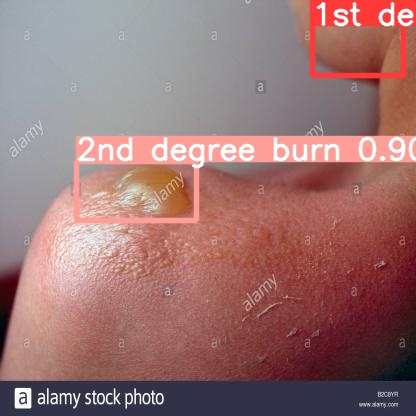

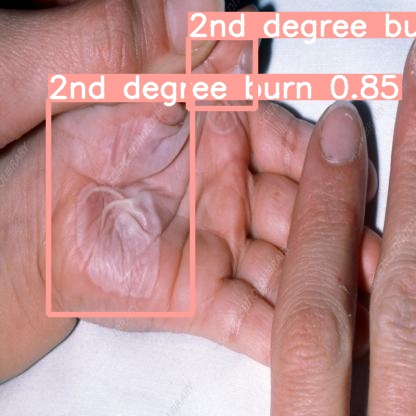

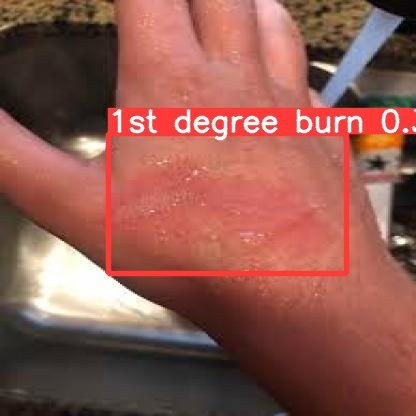

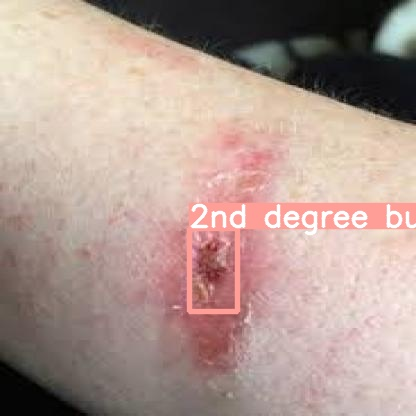

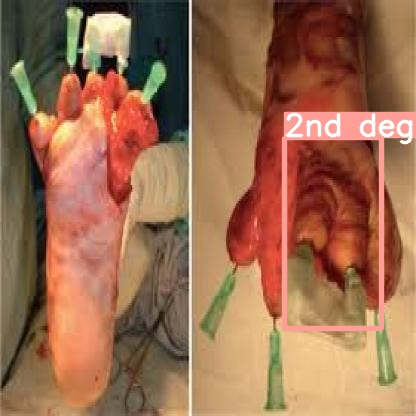

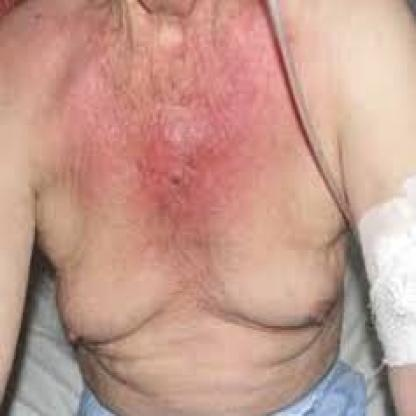

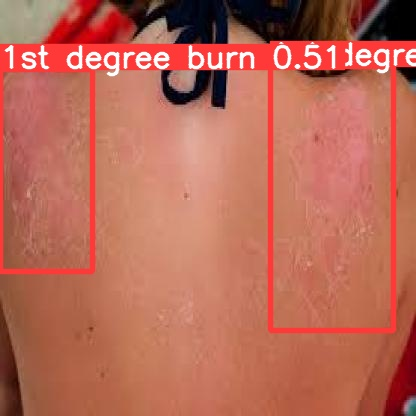

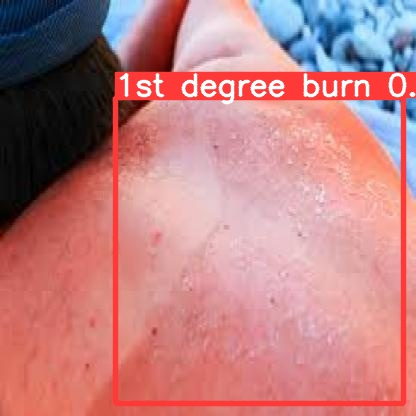

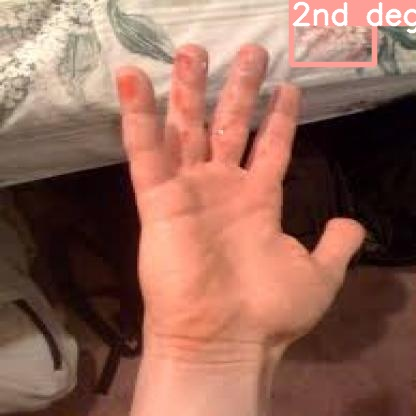

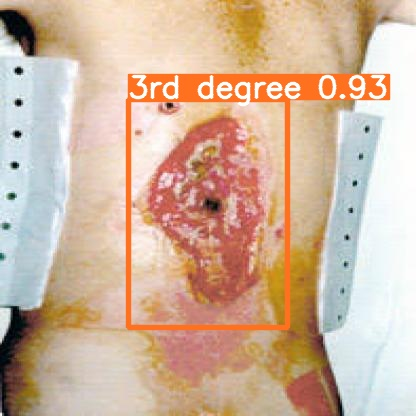

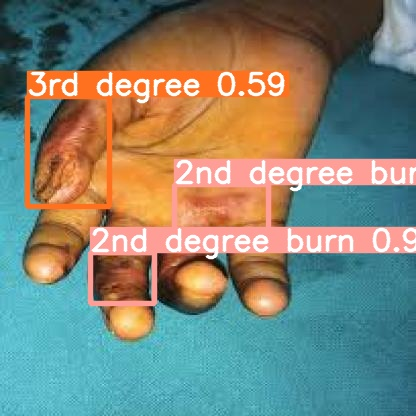

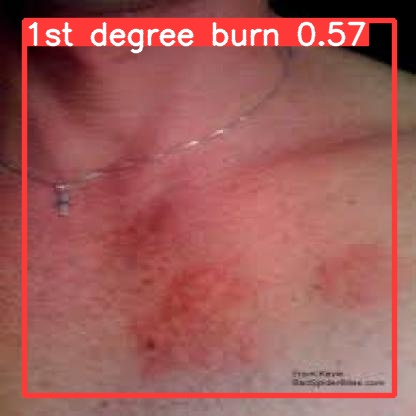

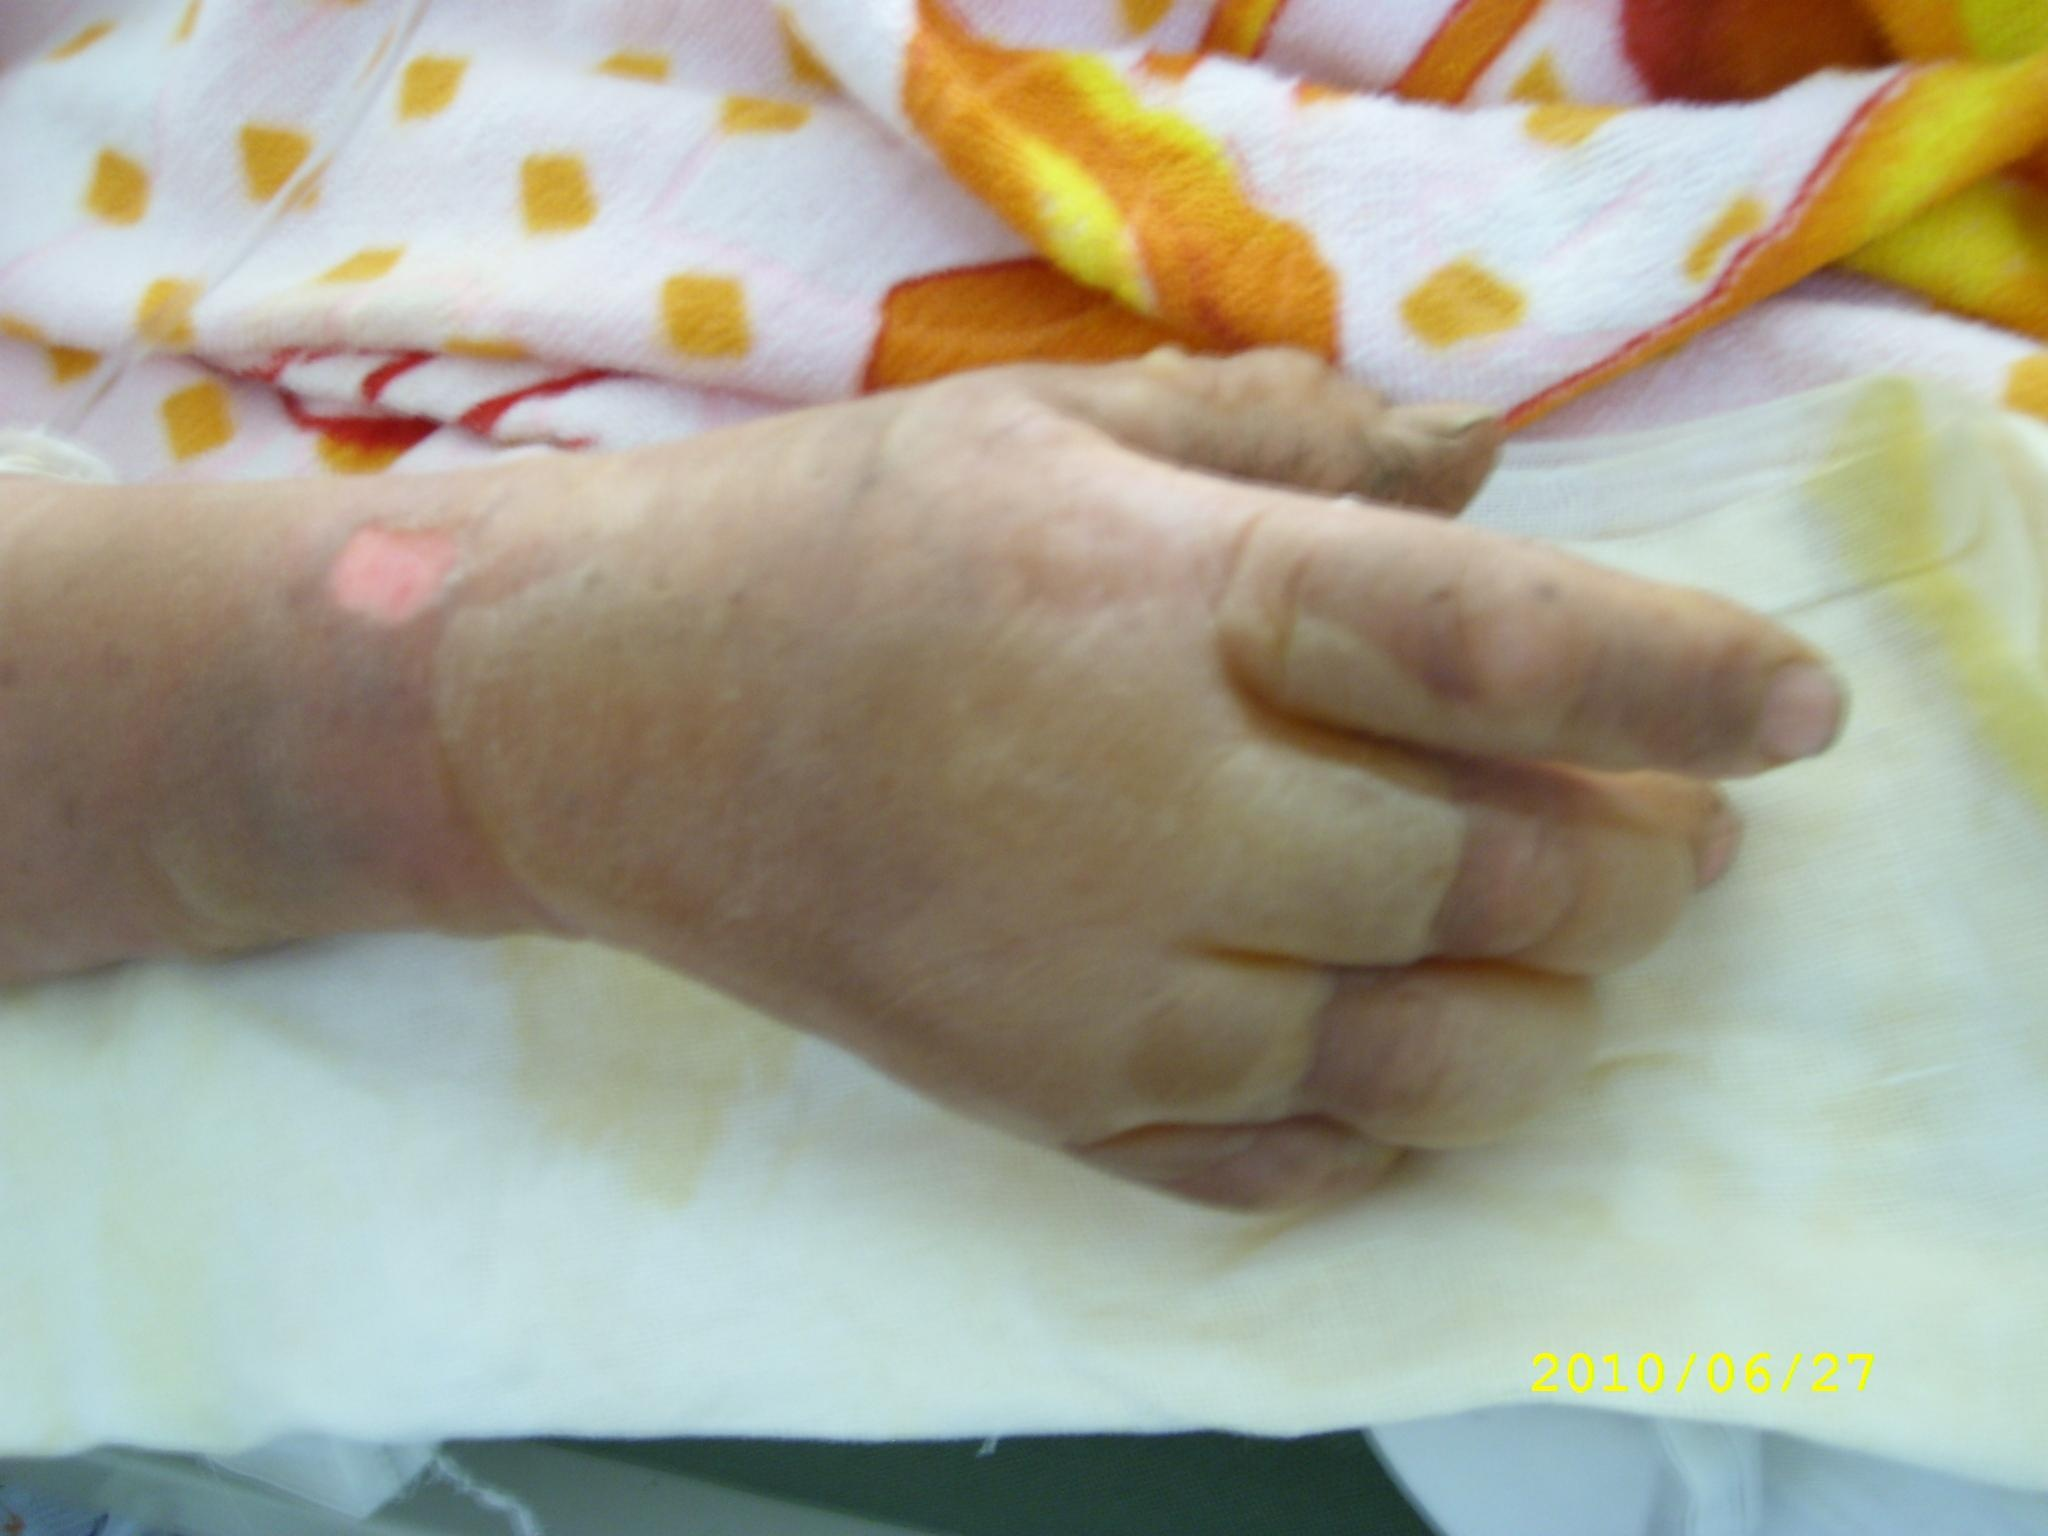

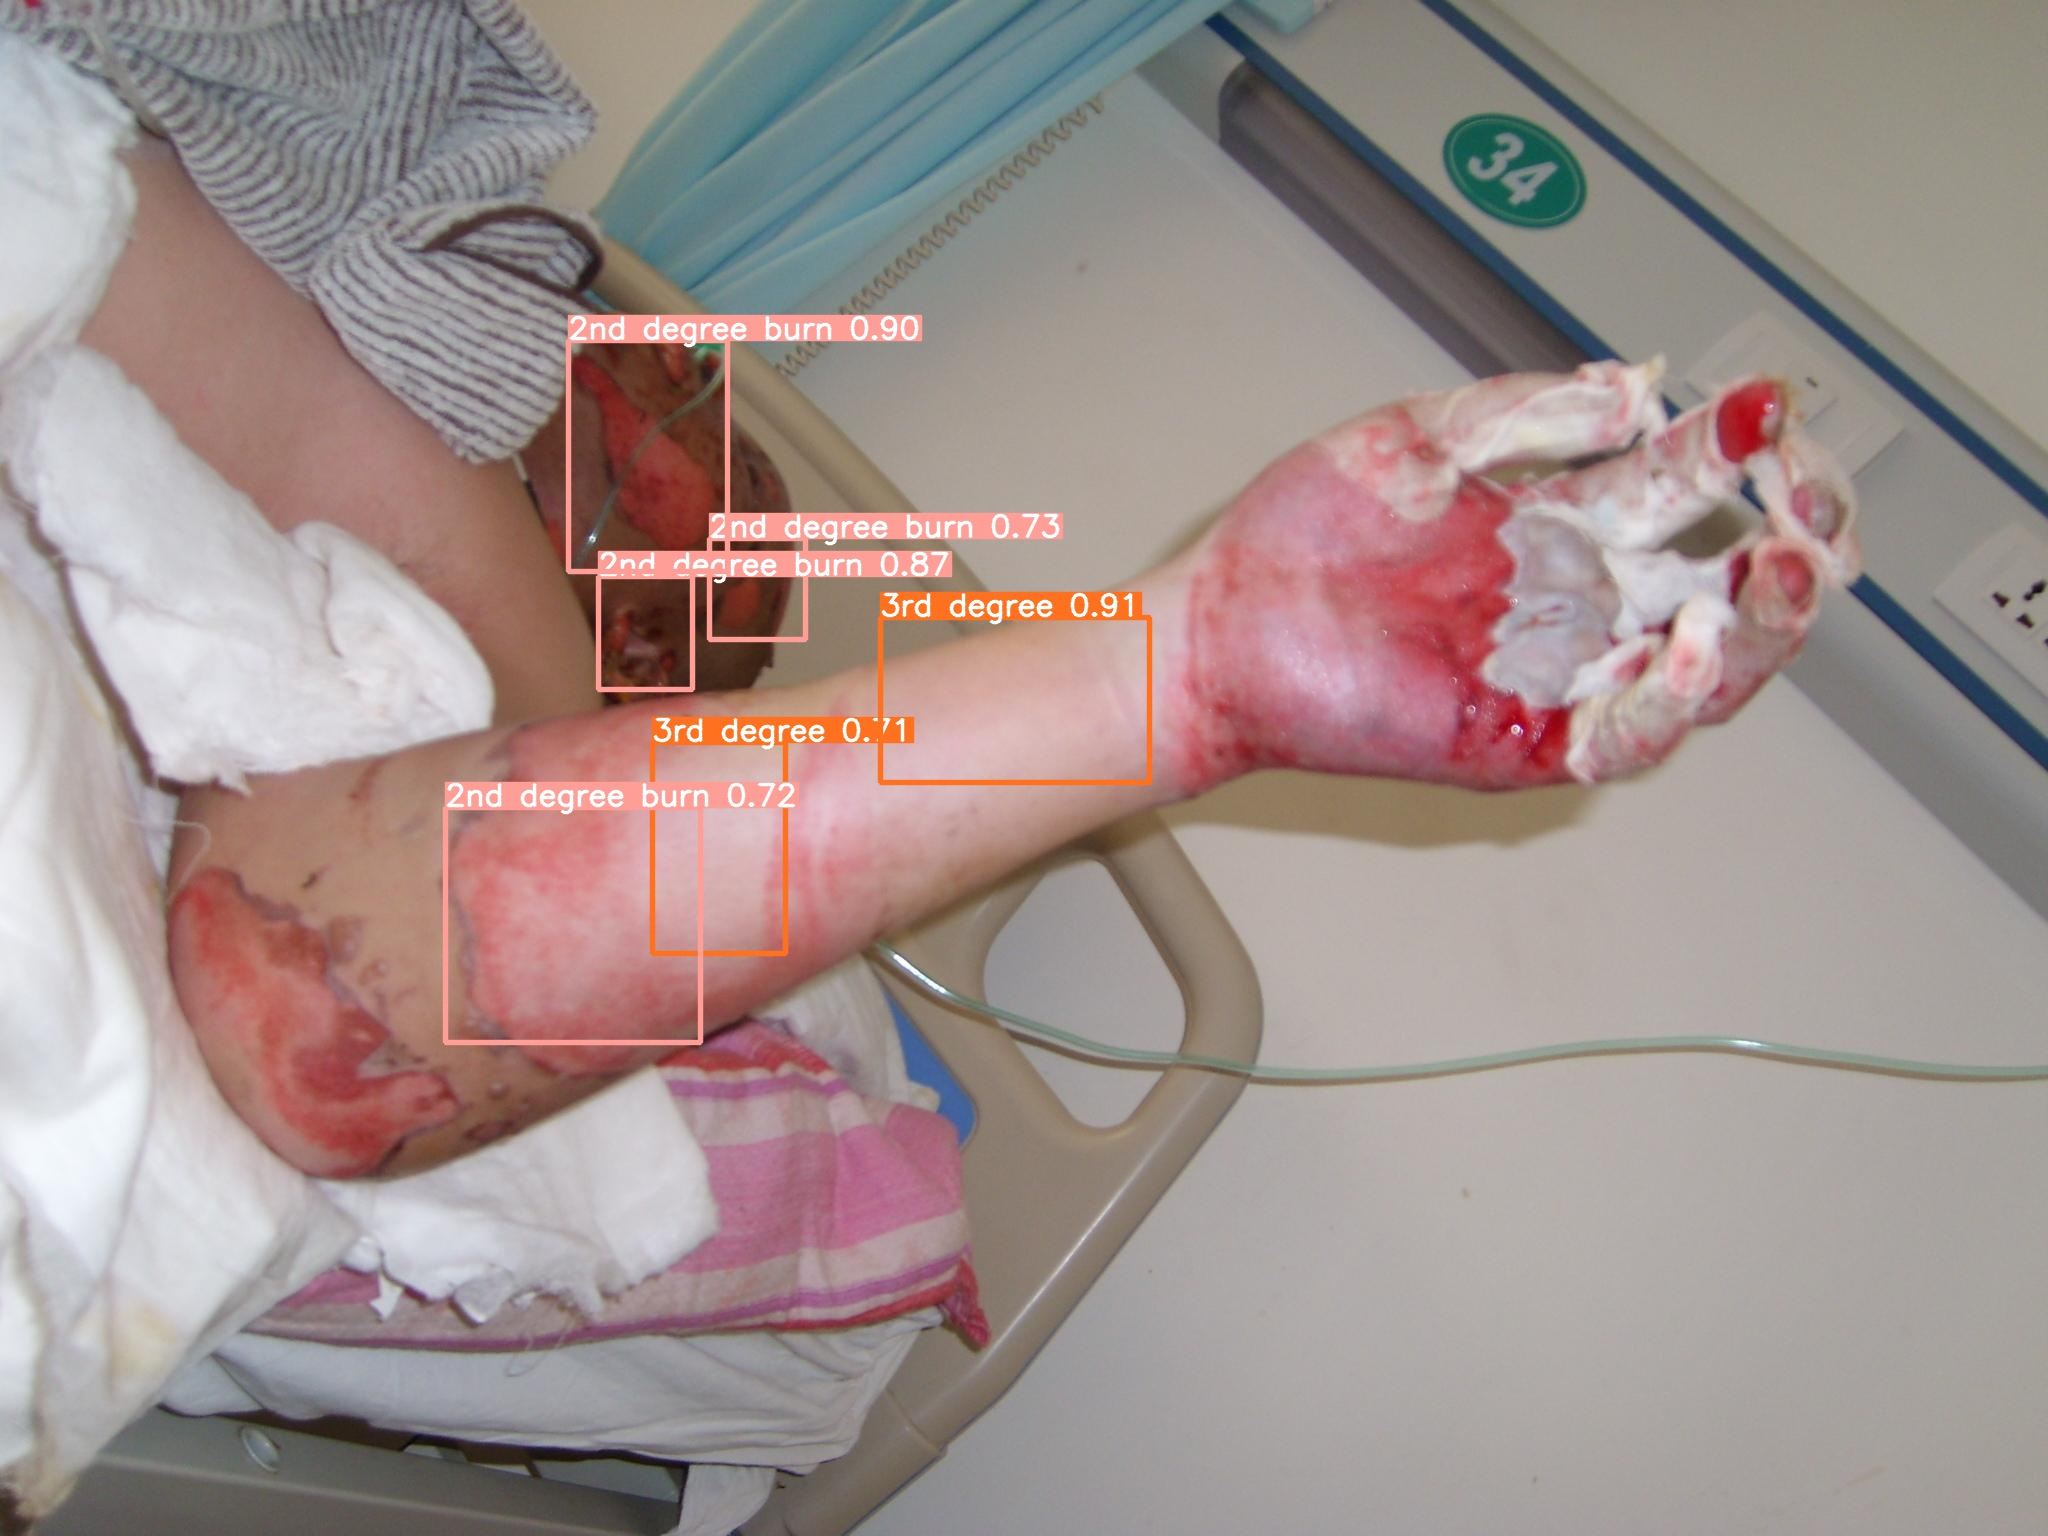

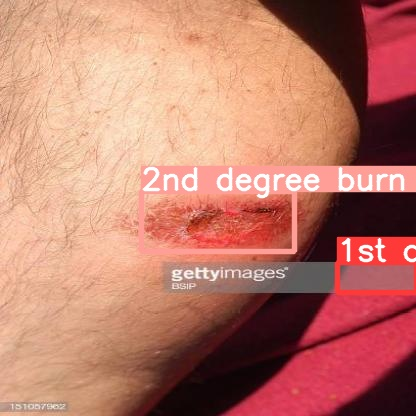

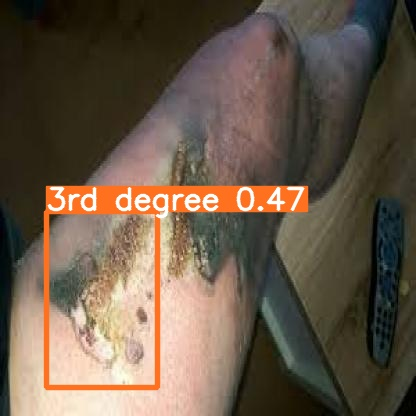

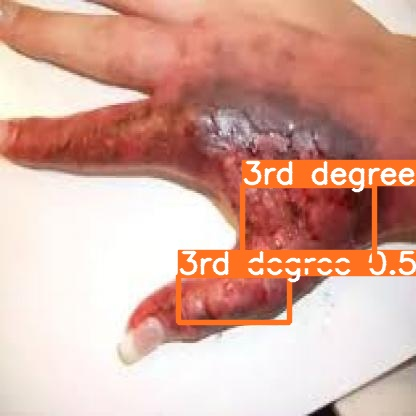

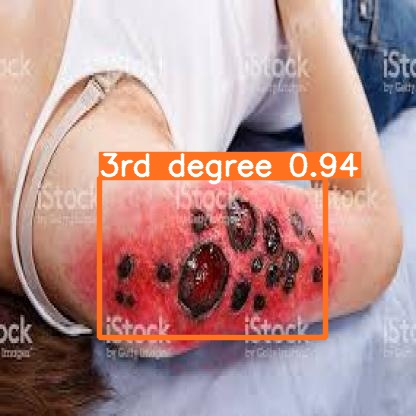

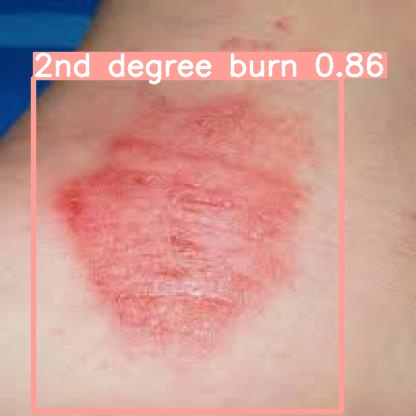

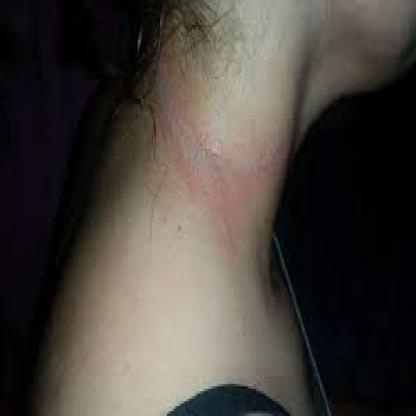

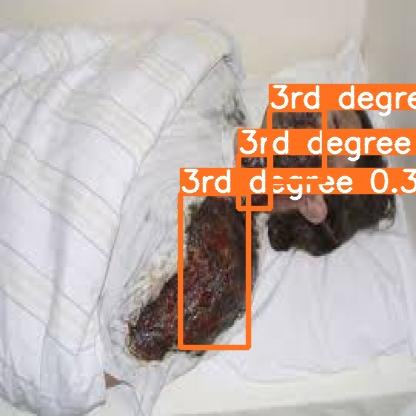

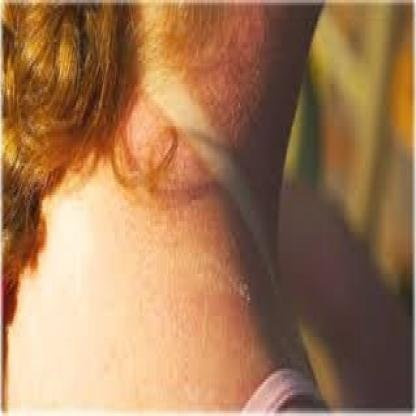

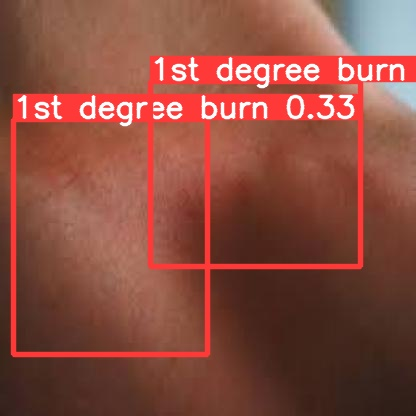

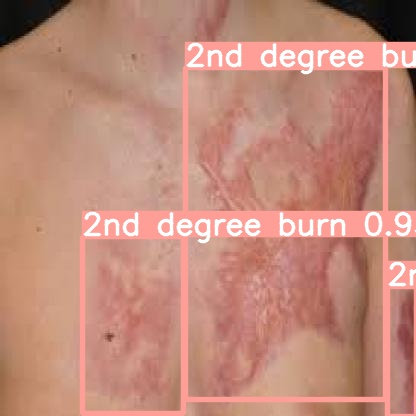

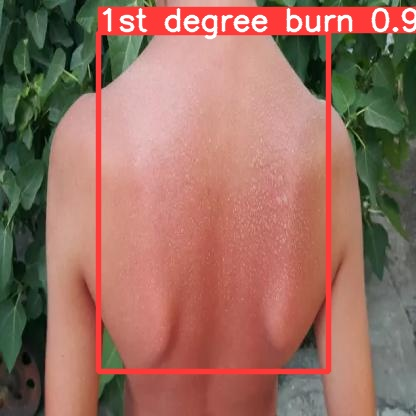

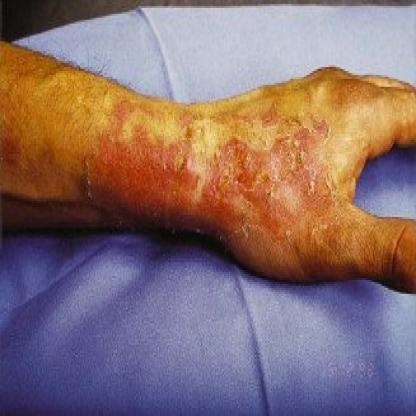

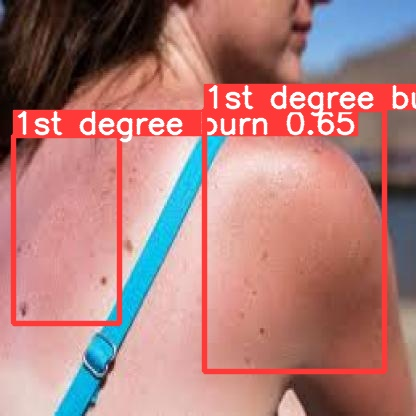

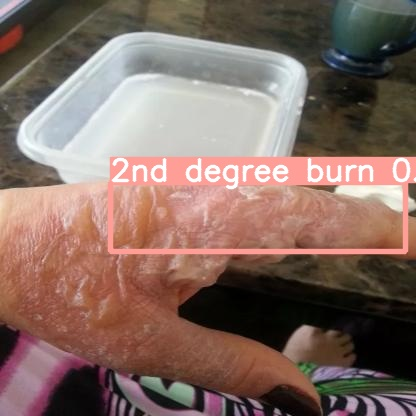

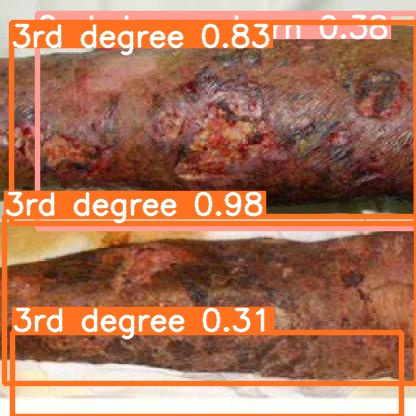

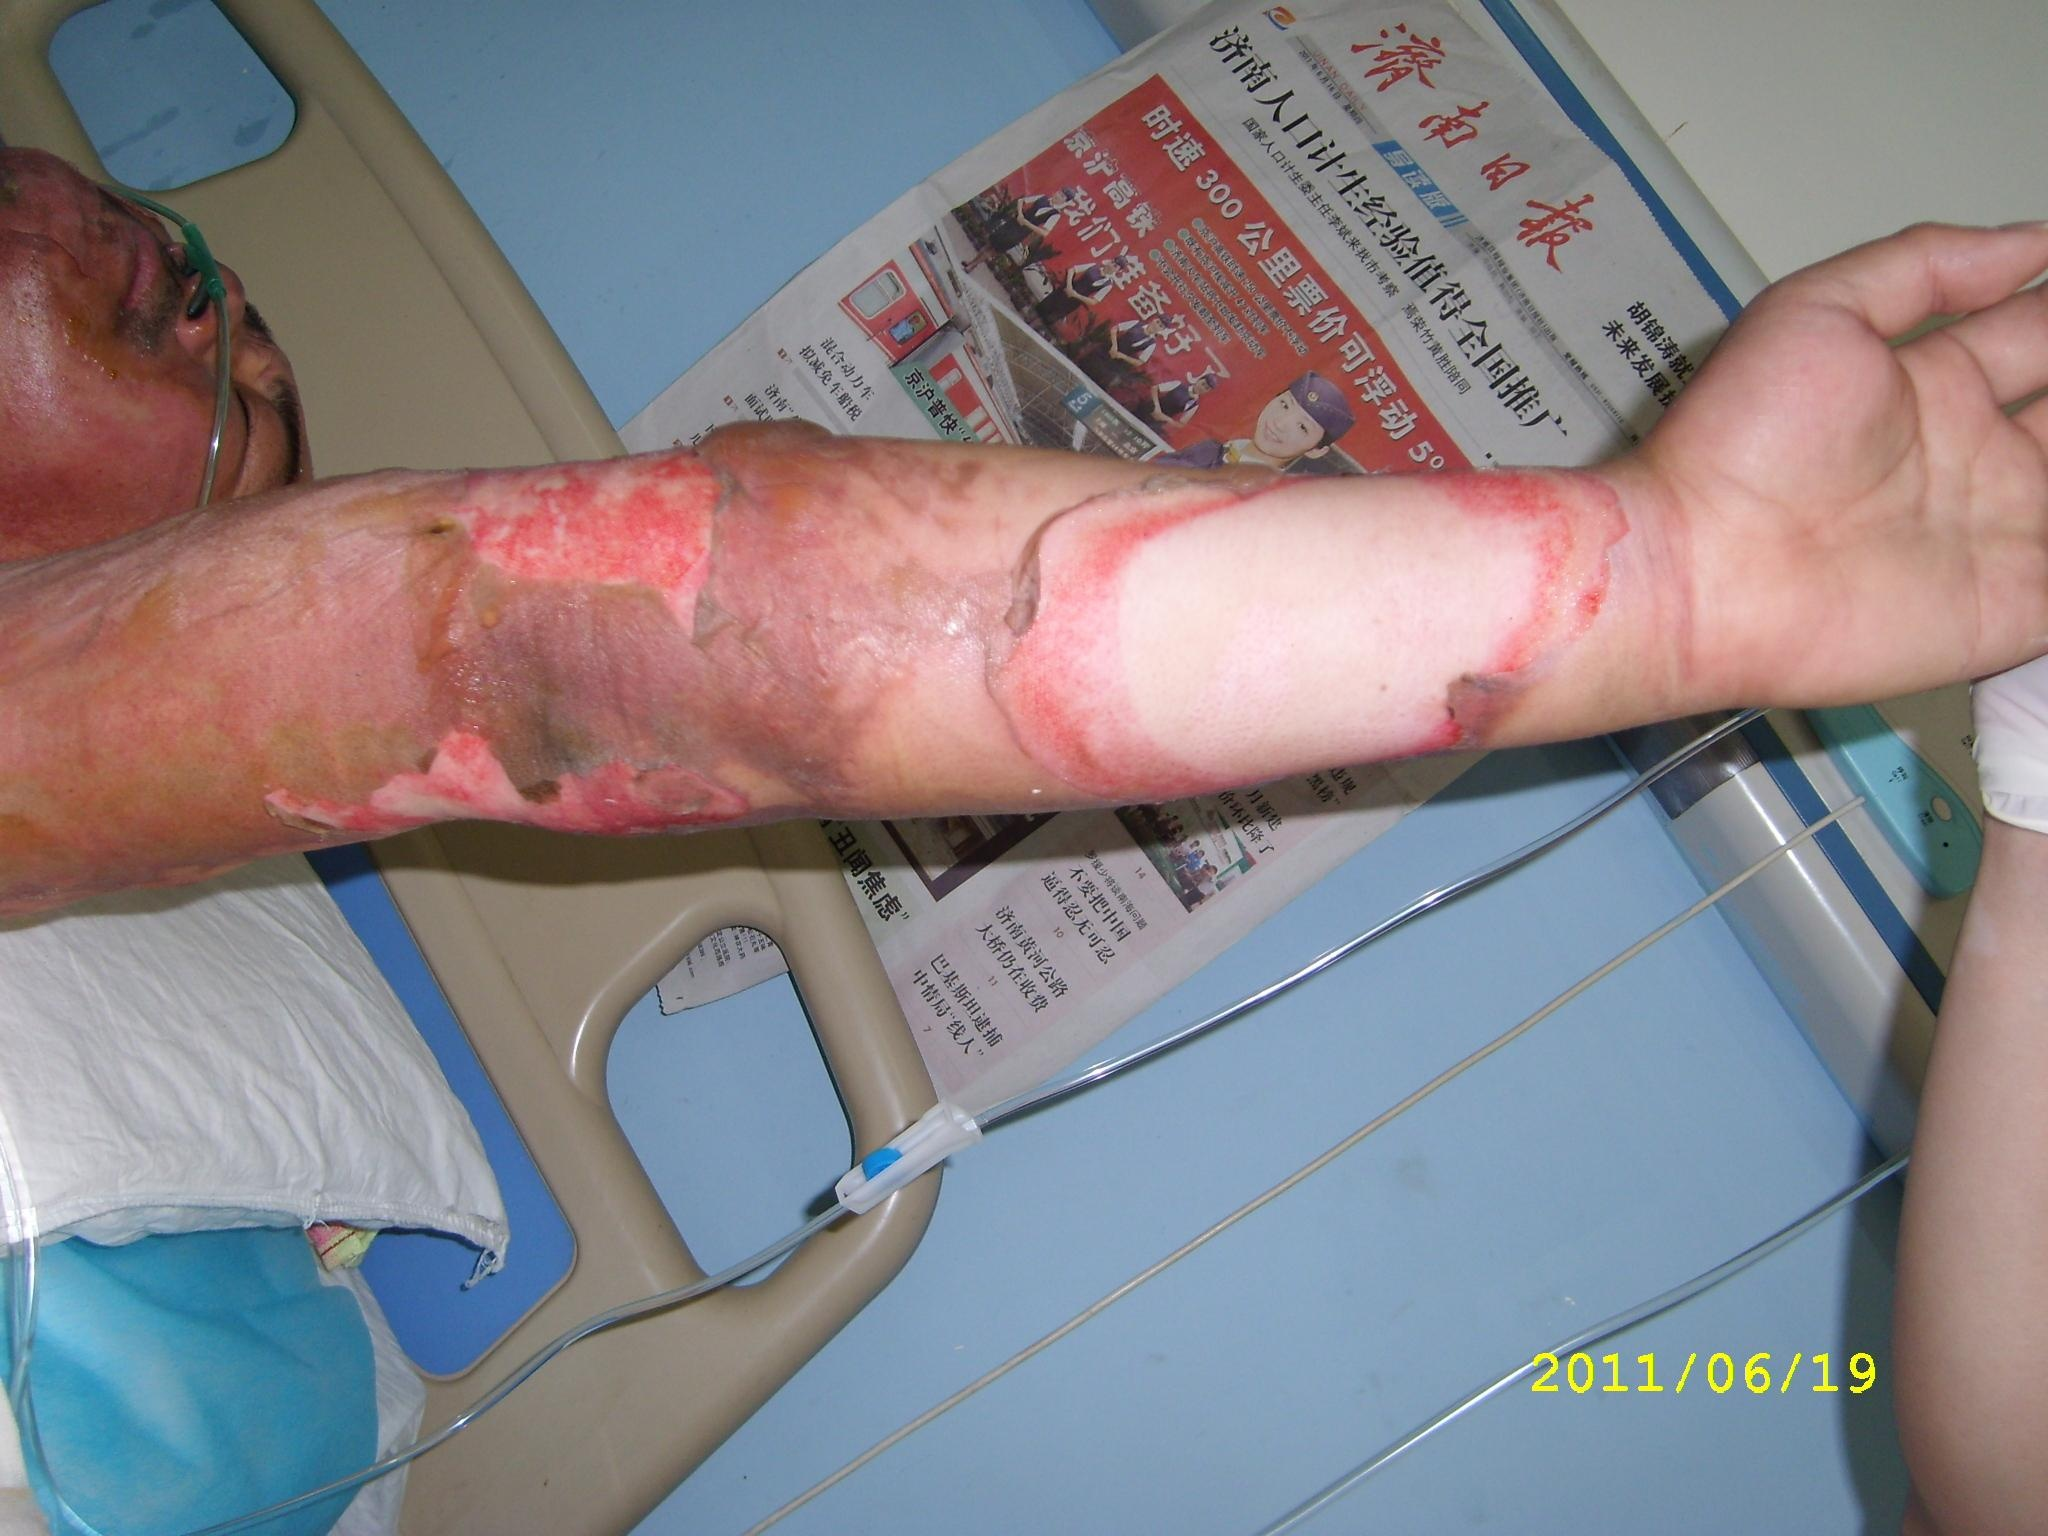

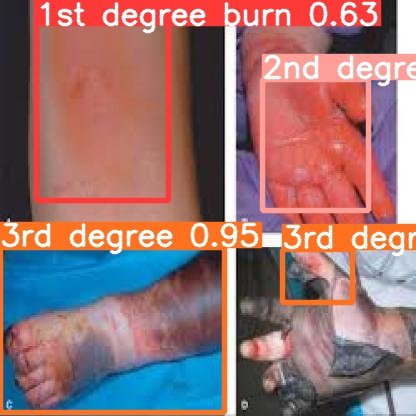

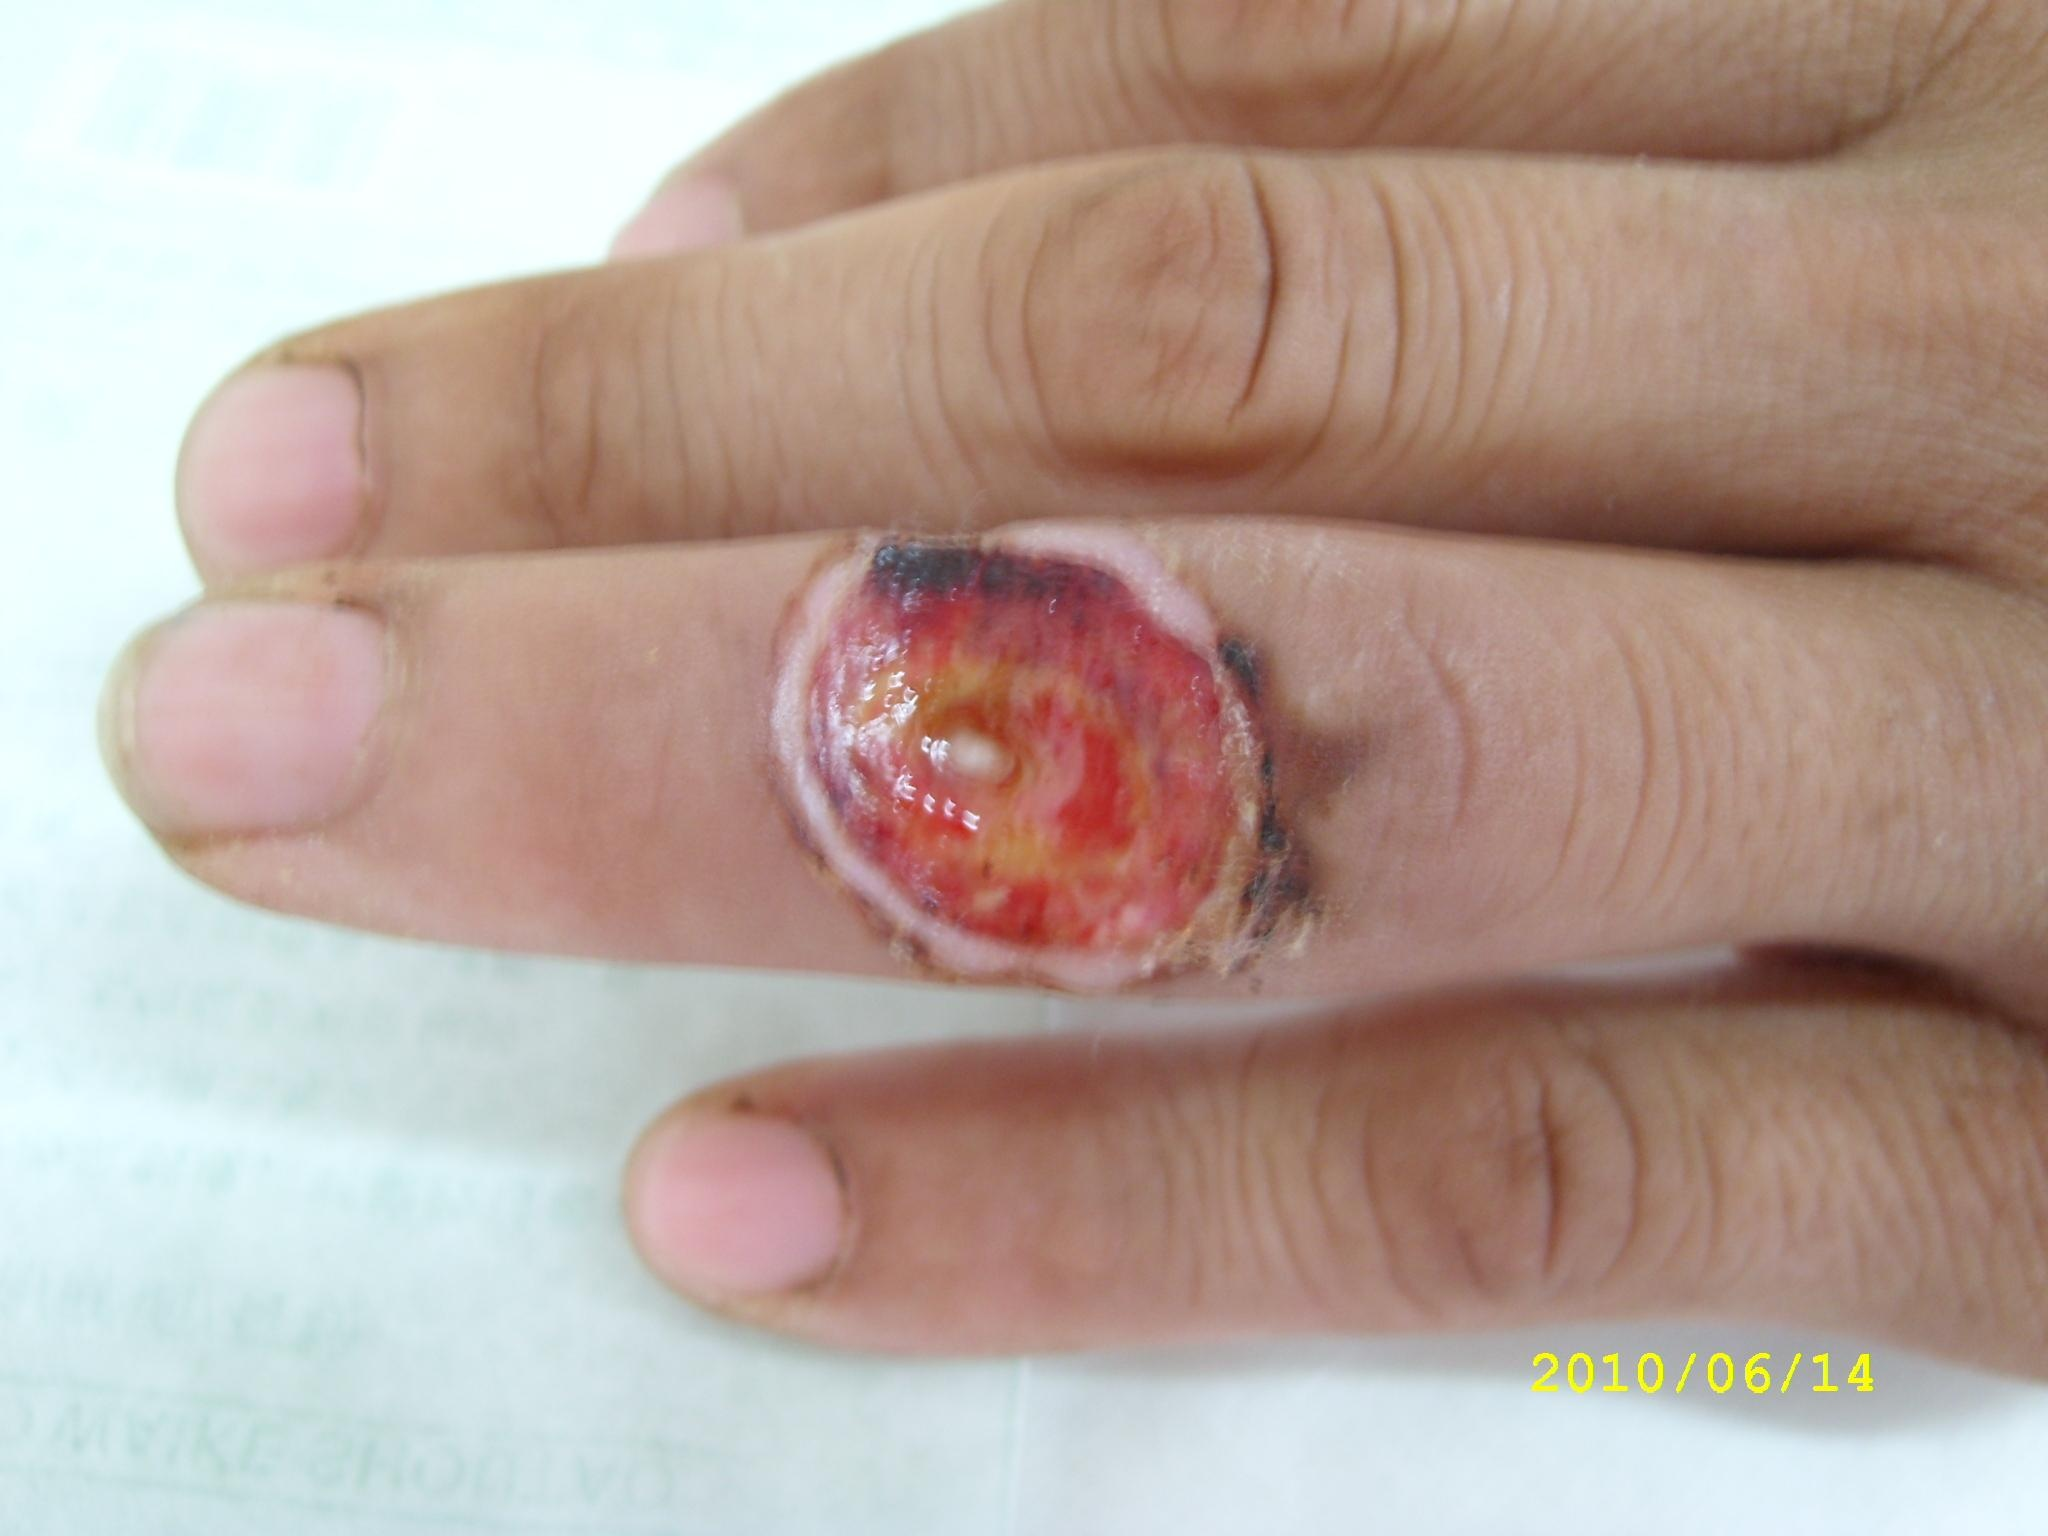

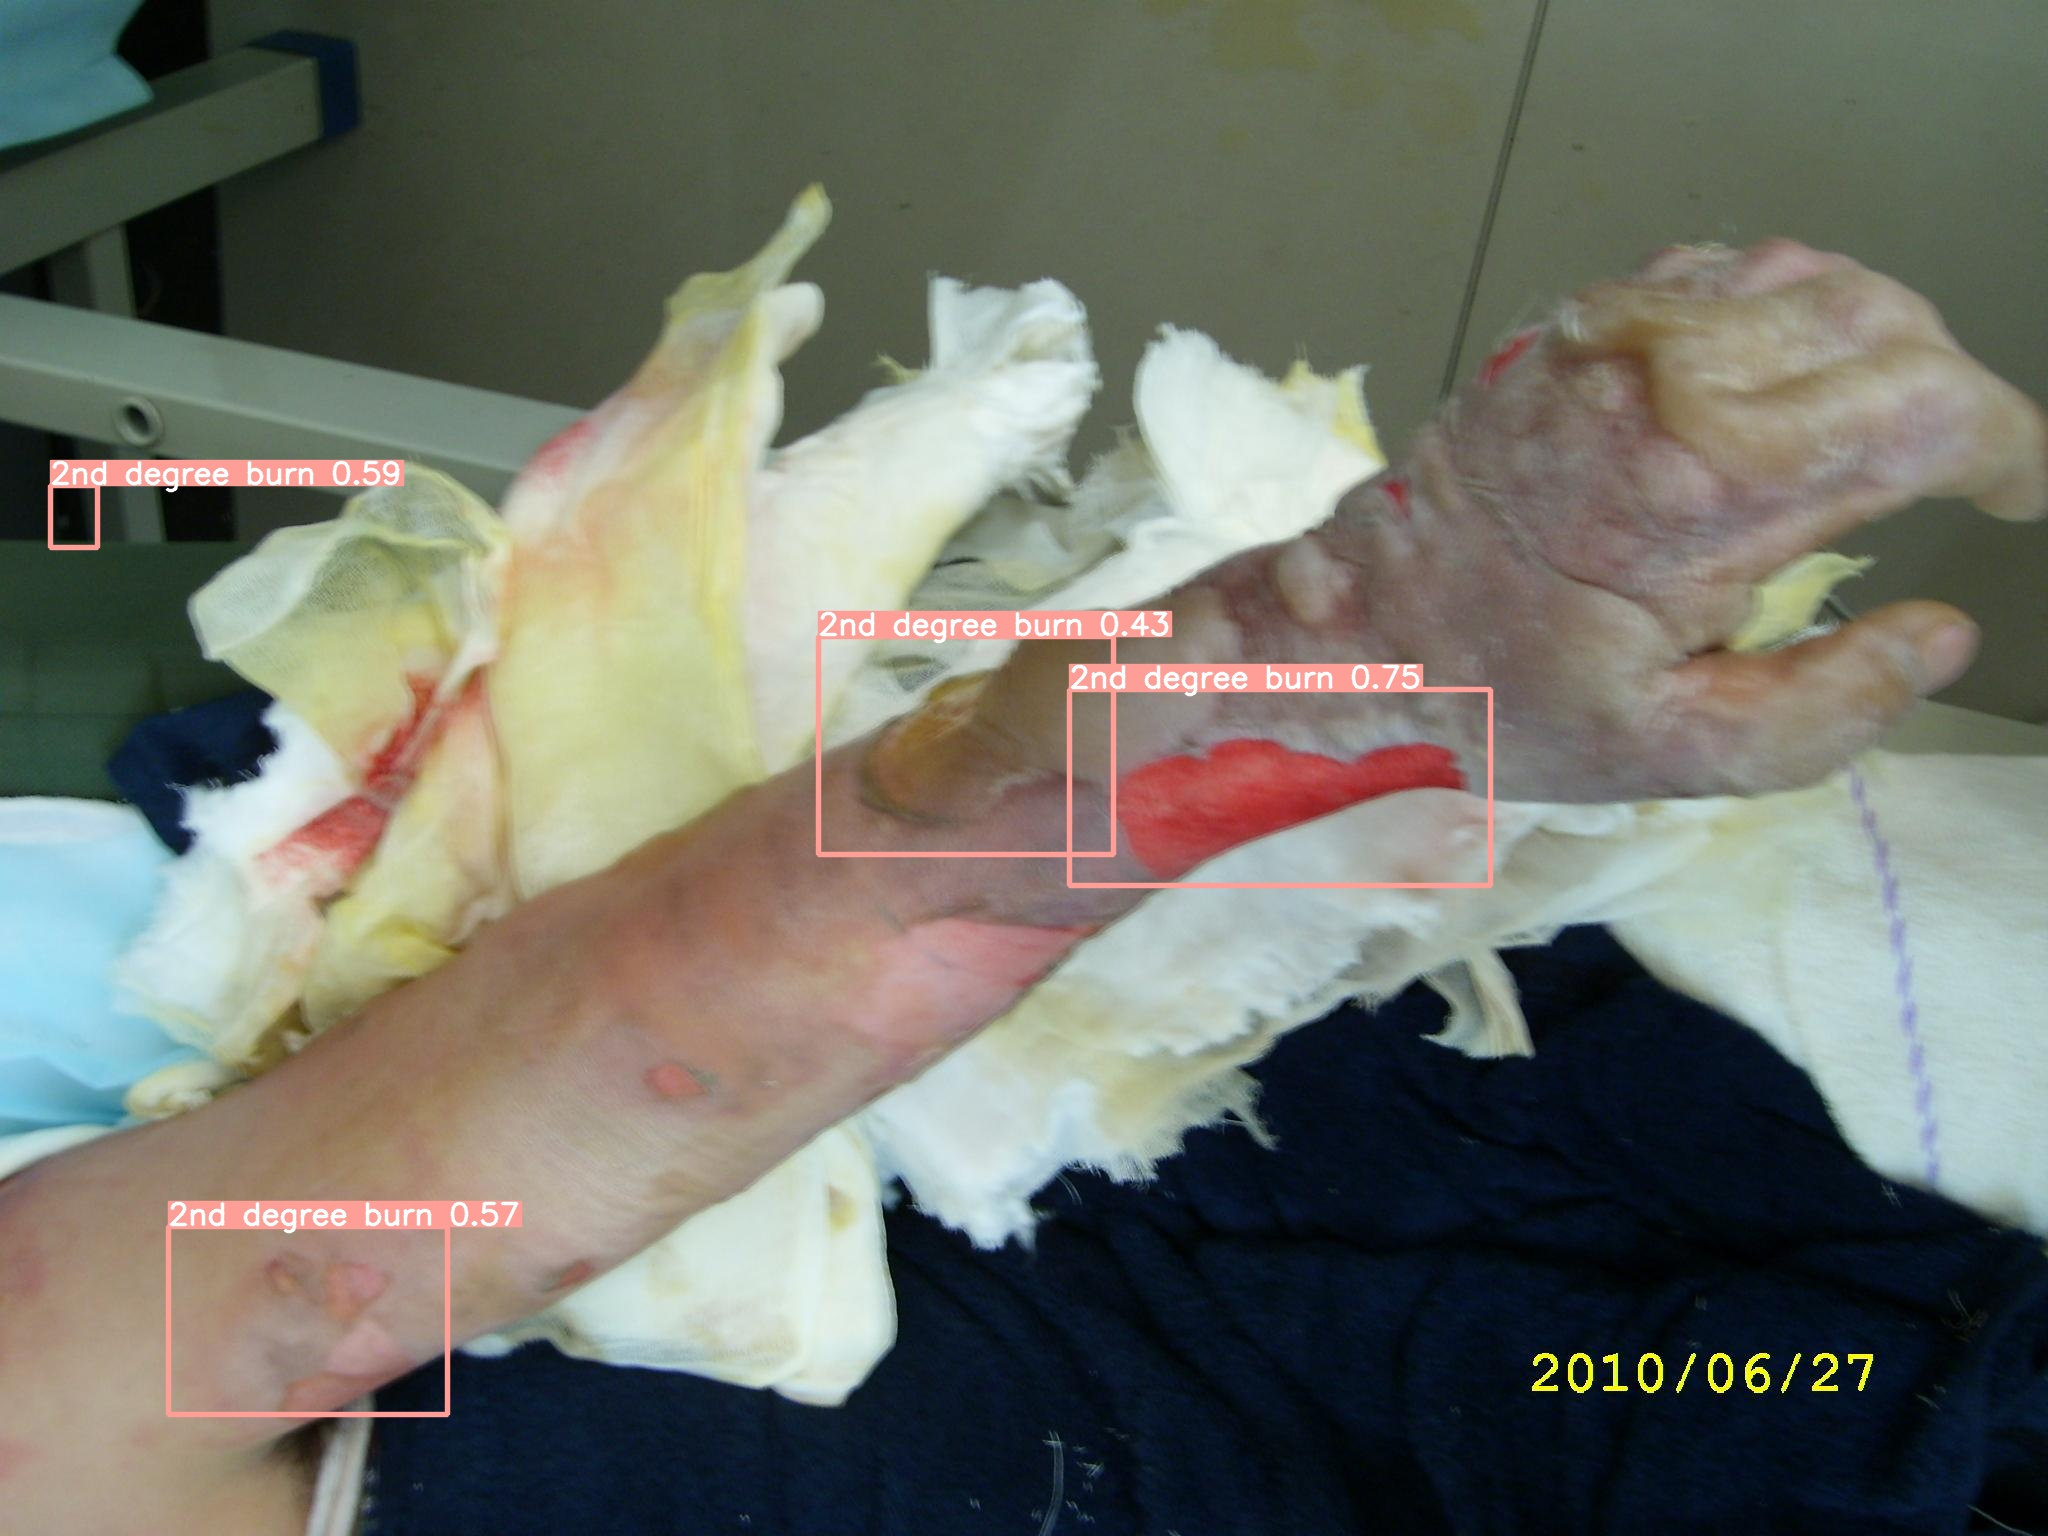

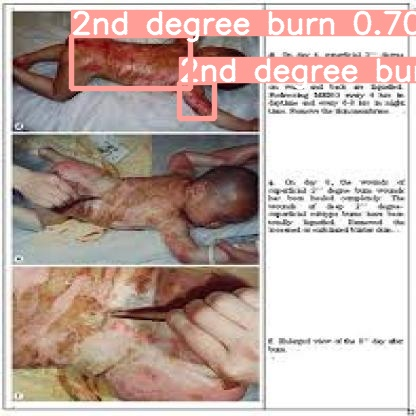

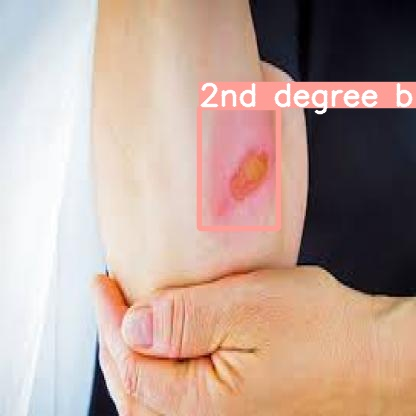

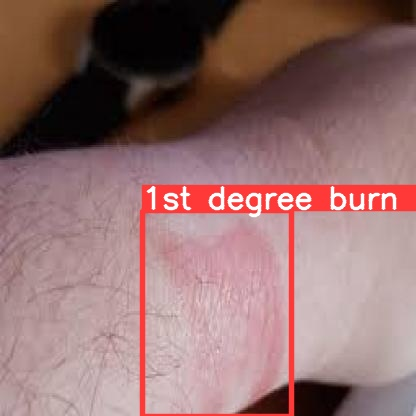

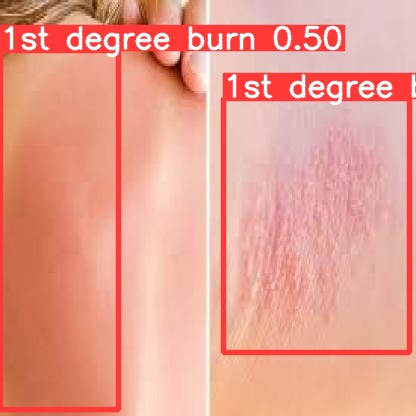

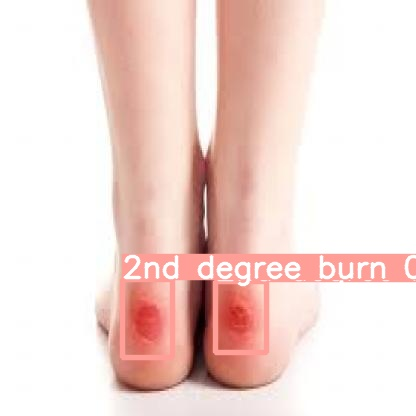

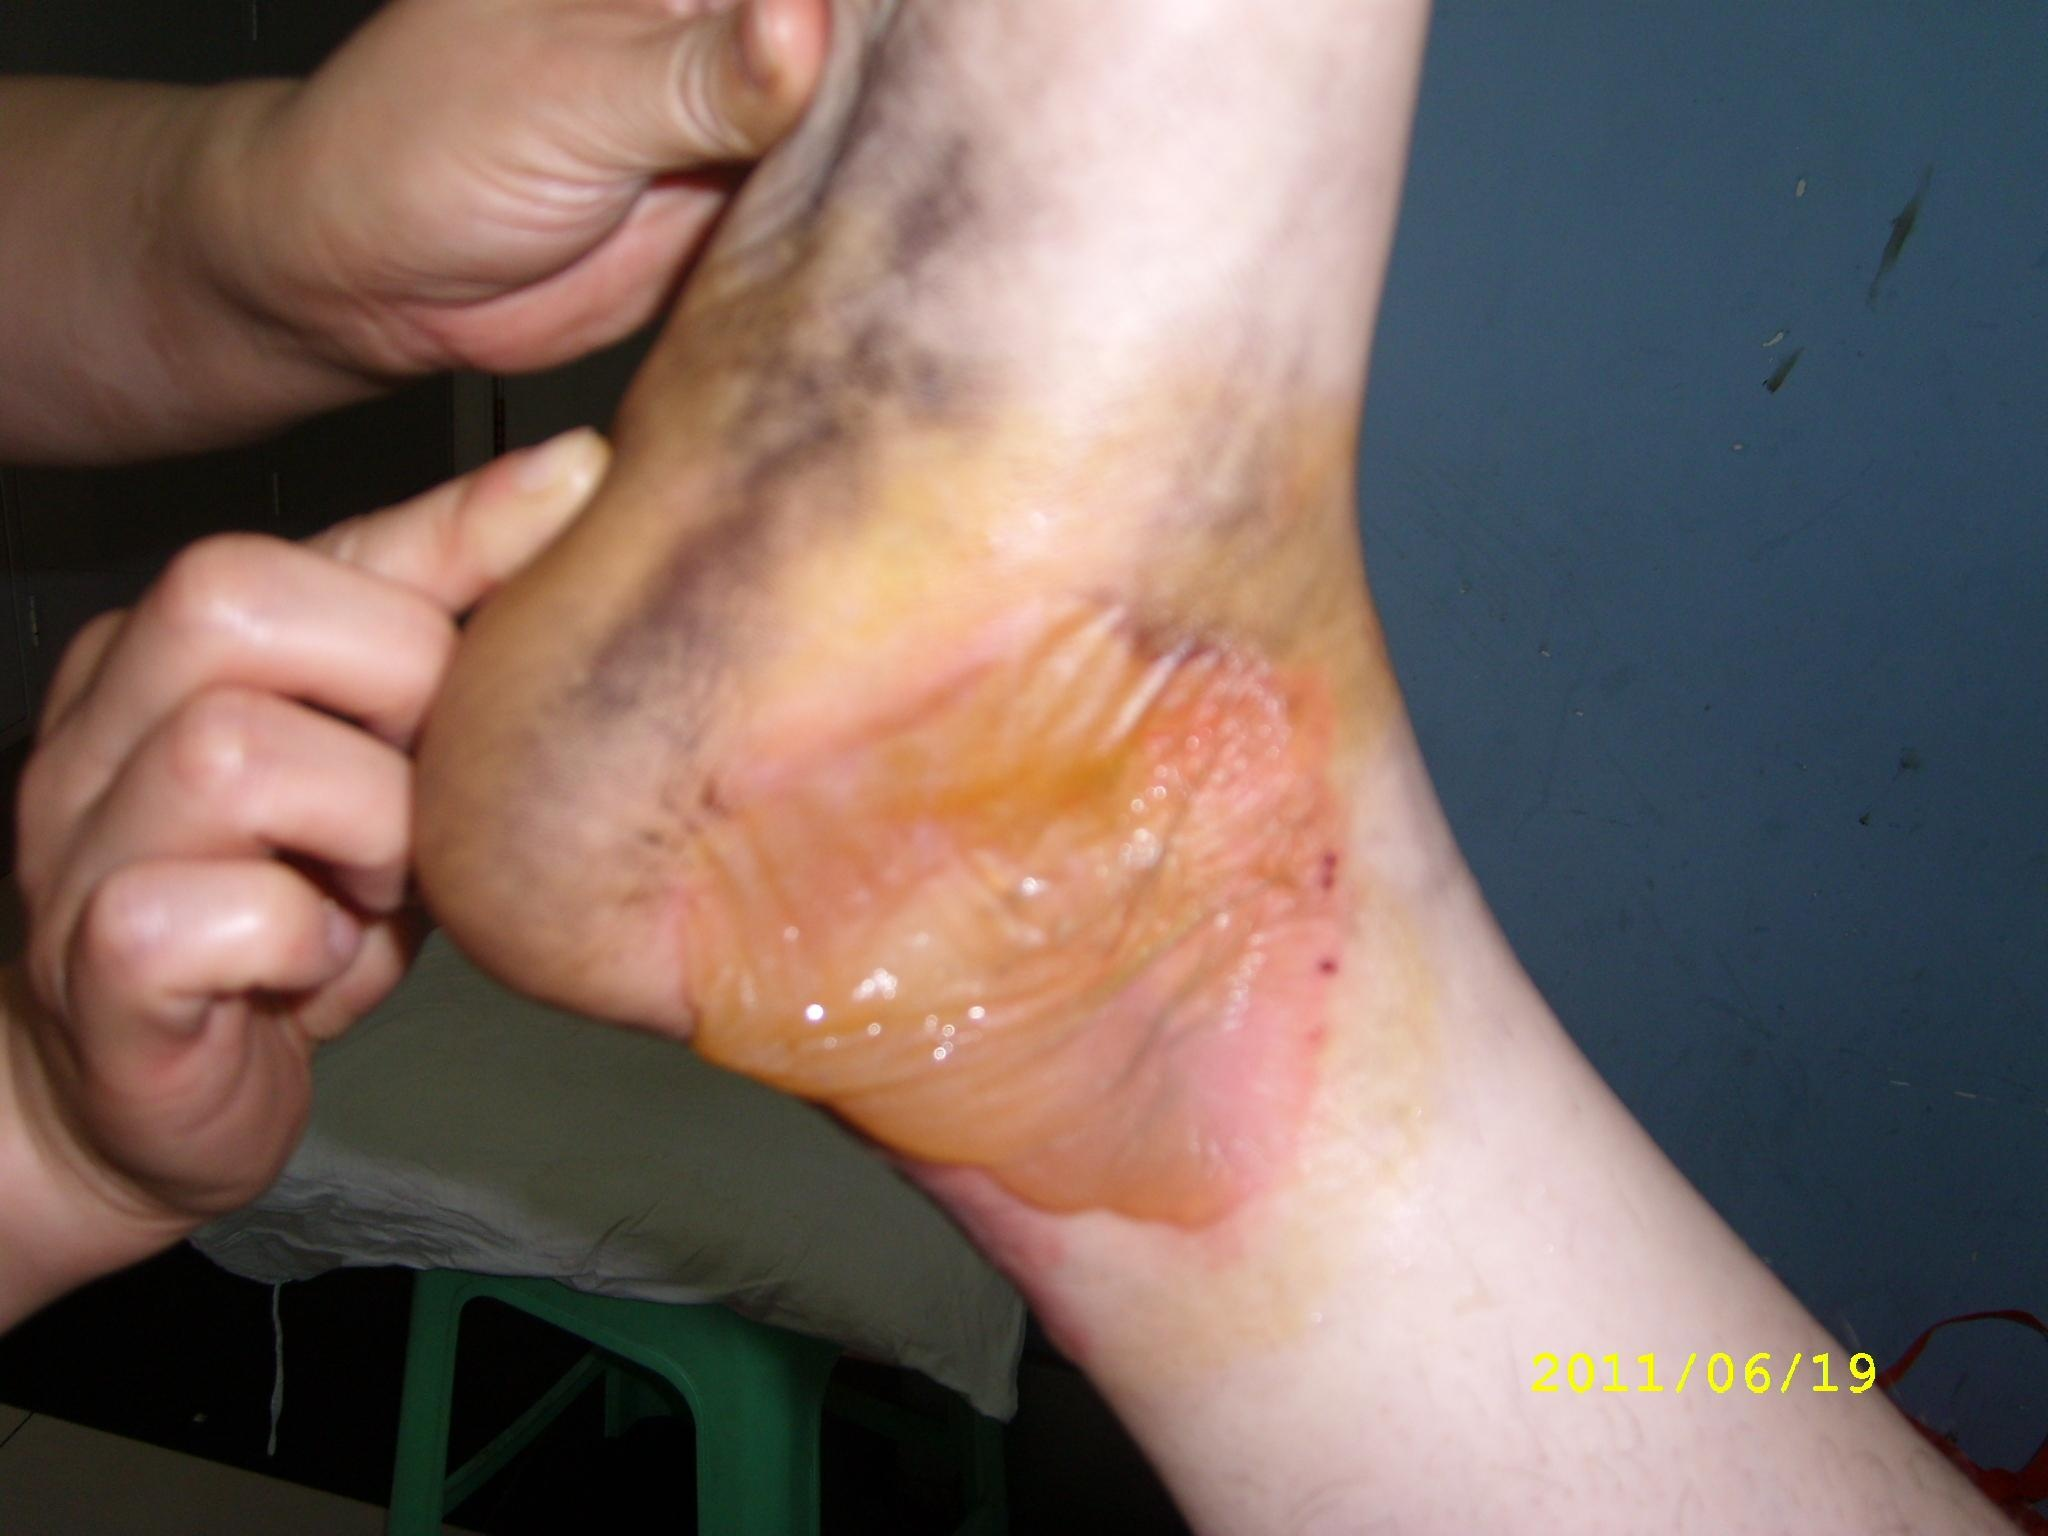

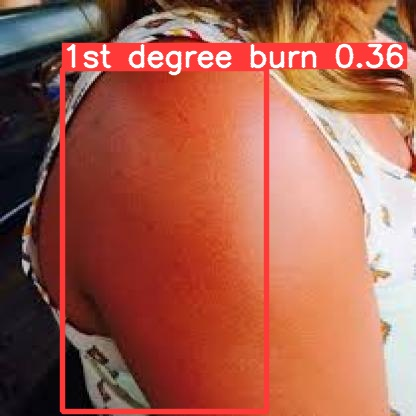

In [11]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## When the training is complete, download the model file as well as the results